<br><br>

<font color=#191347 ><font>
<p style = "font-family:times;">
    <font size="7">
        Interactive Learning 
    </font>    
</p>

<br>
    
<font color=#ed1c24><font>
<p style = "font-family:optima;">
    <font size="6">
        Homework #1
    </font>    
<font color=#000000> <font>
</p>

> $\textit{Mohammad Saadati - 810198410}$

In [155]:
from BP_reward import get_reward
import random
import matplotlib.pyplot as plt
import numpy as np

STUDENT_ID = 810198410
P_SW = 0.8
P_SL = 0.7

# Question 2

In [156]:
def draw_reward_trial_plot(rewards, doctor_name, _color):
    plt.figure(figsize=(8,6))
    plt.plot(range(1,101), rewards, label="reward", color = _color)
    plt.ylabel('sum of rewrads')
    plt.xlabel('trial')
    plt.title('Sum of rewards for Doctor '+ doctor_name)
    plt.legend()
    plt.grid()
    plt.show()

## Doctor A

In [157]:
def doctor_a_single_action(prev_action):
    another_action = 2 if prev_action == 1 else 1  
    reward = get_reward(prev_action, STUDENT_ID)
    next_action = None
    
    if reward > 0:
        if random.random() < P_SW:
            next_action = prev_action
        else:
            next_action = another_action
    else:
        if random.random() > P_SL:
            next_action = prev_action
        else:
            next_action = another_action
            
    return next_action, reward

In [158]:
def doctor_a_approach():
    all_rewards = []
    sum_rewards = 0

    action = random.randint(1, 2)
    for i in range(100):
        action, reward = doctor_a_single_action(action)
        sum_rewards += reward
        all_rewards.append(sum_rewards)
        
    return all_rewards

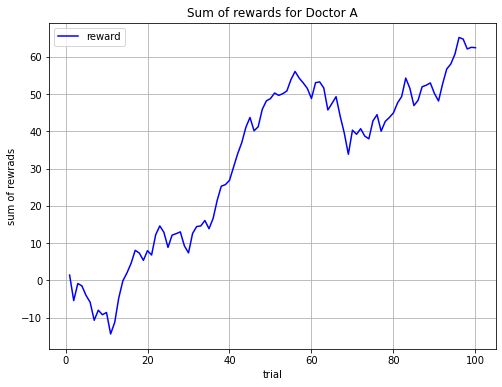

In [159]:
all_rewards = doctor_a_approach()

draw_reward_trial_plot(all_rewards, "A", 'b')

# Doctor B

In [160]:
def doctor_b_single_action():
    action = random.randint(1, 2) 
    reward = get_reward(action, STUDENT_ID)
    return reward

In [161]:
def doctor_b_approach():
    all_rewards = []
    sum_rewards = 0

    for i in range(100):
        reward = doctor_b_single_action()
        sum_rewards += reward
        all_rewards.append(sum_rewards)
        
    return all_rewards

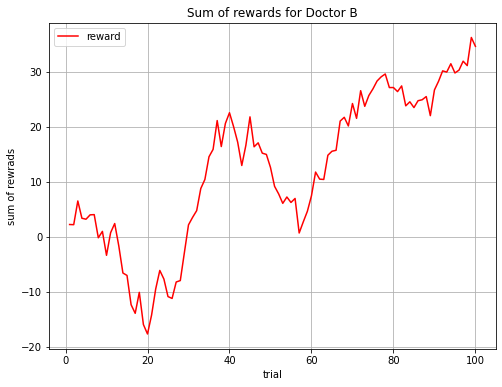

In [162]:
all_rewards = doctor_b_approach()

draw_reward_trial_plot(all_rewards, "B", 'r')

# Doctor C

In [163]:
def doctor_c_approach():
    all_rewards = []
    sum_rewards = 0

    for i in range(10):
        reward = get_reward(1, STUDENT_ID)
        sum_rewards += reward
        all_rewards.append(sum_rewards)

    for i in range(10):
        reward = get_reward(2, STUDENT_ID)
        sum_rewards += reward
        all_rewards.append(sum_rewards)

    best_action = 1 if all_rewards[9] > (all_rewards[19] - all_rewards[9]) else 2

    for i in range(8):
        for j in range(7):
            reward = get_reward(best_action, STUDENT_ID)
            sum_rewards += reward
            all_rewards.append(sum_rewards)
        for j in range(3):
            action = random.randint(1, 2)
            reward = get_reward(action, STUDENT_ID)
            sum_rewards += reward
            all_rewards.append(sum_rewards)
    
    return all_rewards

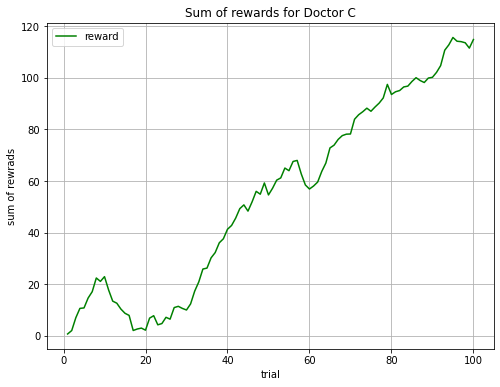

In [164]:
all_rewards = doctor_c_approach()

draw_reward_trial_plot(all_rewards, "C", 'g')

# Question 3

In [165]:
def draw_confidence_interval(all_rewards, doctor_name):
    lower_bound = np.percentile(all_rewards, 2.5)
    upper_bound  = np.percentile(all_rewards, 97.5)
    print('Lower bound:',lower_bound)
    print('Upper bound: ',upper_bound)

    all_rewards = np.array(all_rewards)

    plt.figure(figsize=(8,6))
    plt.hist(all_rewards[all_rewards<lower_bound], color='r', label="Outside the confidence interval")
    plt.hist(all_rewards[(all_rewards>=lower_bound)&(all_rewards<=upper_bound)], color='g', label="Inside the confidence interval")
    plt.hist(all_rewards[all_rewards>upper_bound], color='r')
    plt.title("95% confidence interval on the rewards of doctor " + doctor_name +" approach")
    plt.xlabel("reward")
    plt.ylabel("frequency")
    plt.legend()
    plt.grid()
    plt.show()

## 5

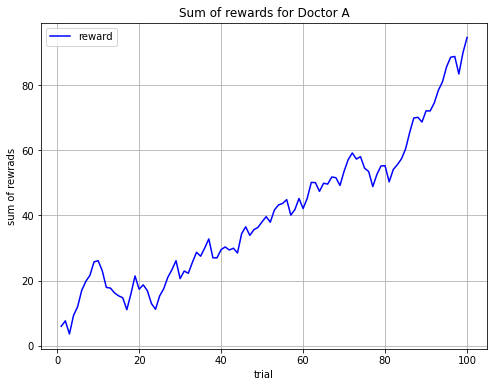

Lower bound: 8.463687133388484
Upper bound:  88.68540630915386


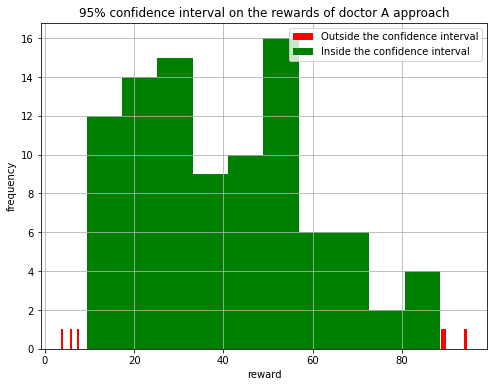

--------------------------------------------------------------------


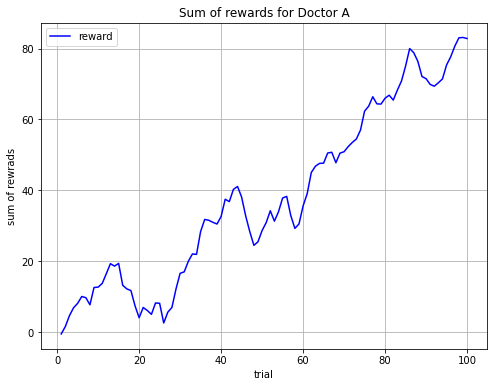

Lower bound: 3.3162578955933646
Upper bound:  81.79250930180545


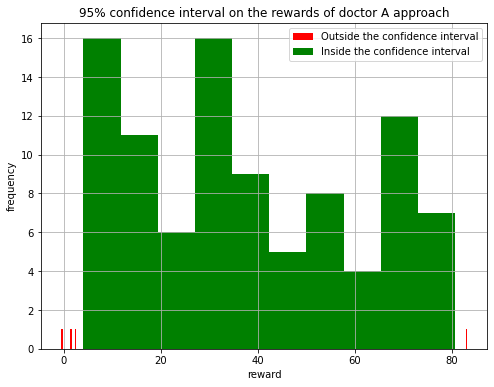

--------------------------------------------------------------------


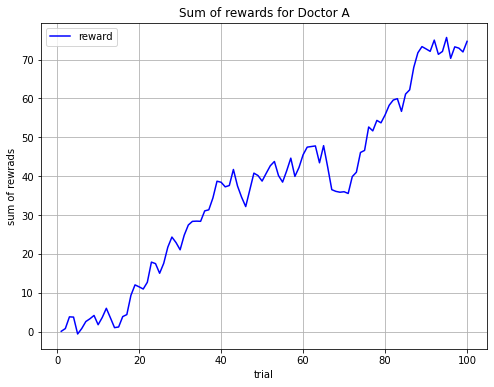

Lower bound: 0.7802647904981144
Upper bound:  74.05821176606868


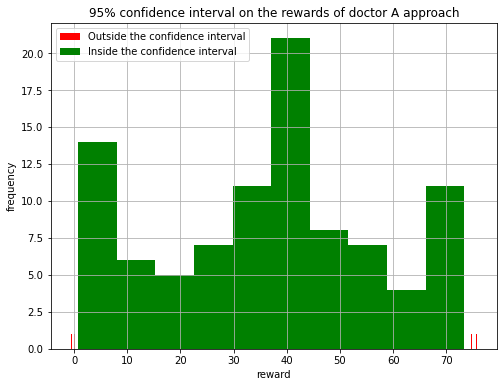

--------------------------------------------------------------------


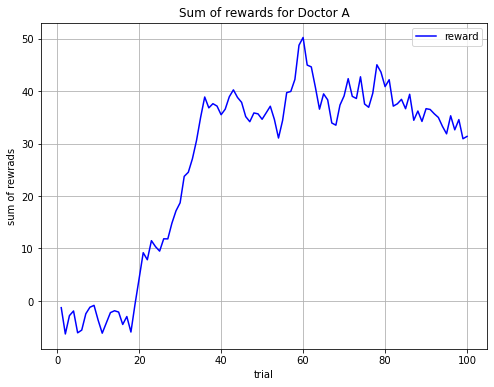

Lower bound: -5.997731066559407
Upper bound:  44.976605813874755


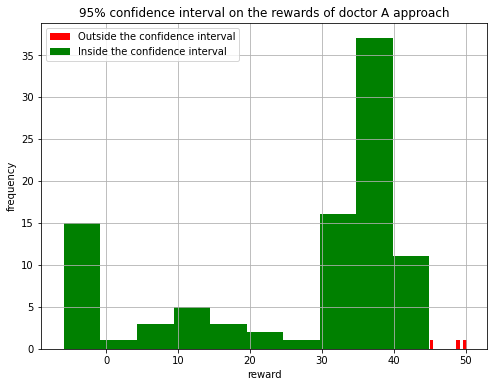

--------------------------------------------------------------------


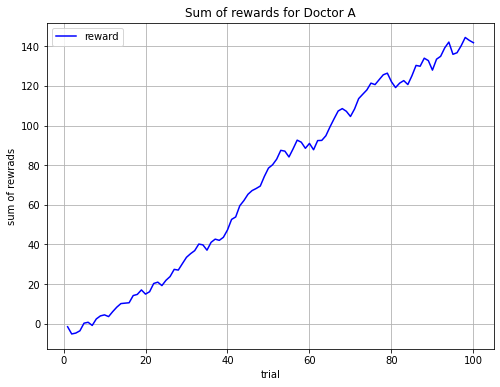

Lower bound: -2.647010236153192
Upper bound:  141.9621414531357


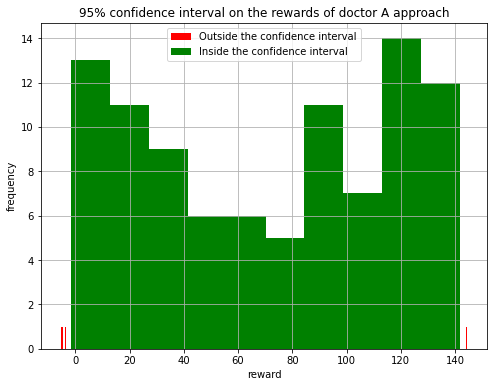

--------------------------------------------------------------------


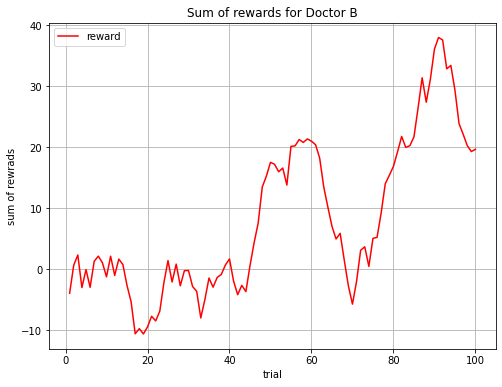

Lower bound: -9.572105704607871
Upper bound:  34.78477580162957


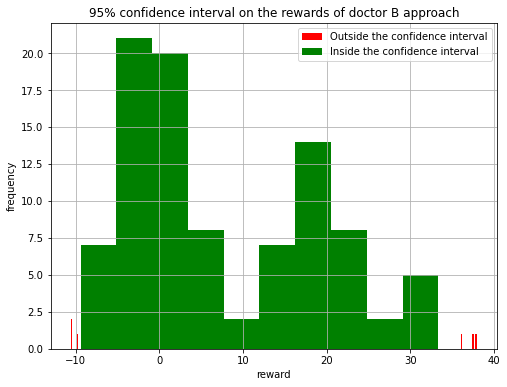

--------------------------------------------------------------------


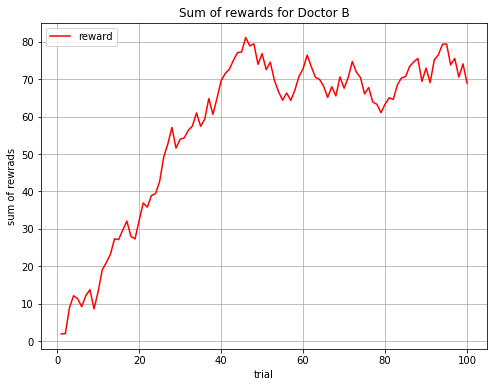

Lower bound: 8.760237998618788
Upper bound:  79.33718661423175


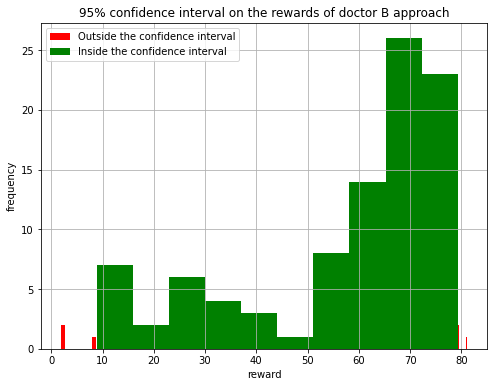

--------------------------------------------------------------------


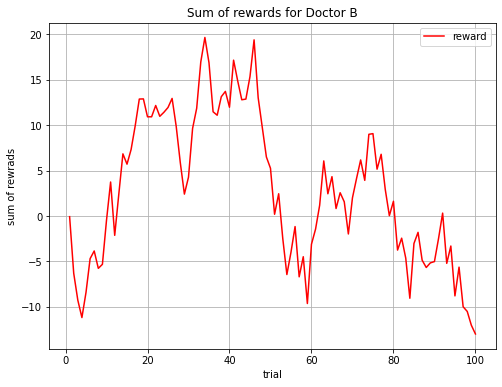

Lower bound: -10.848787127693292
Upper bound:  17.05566247987292


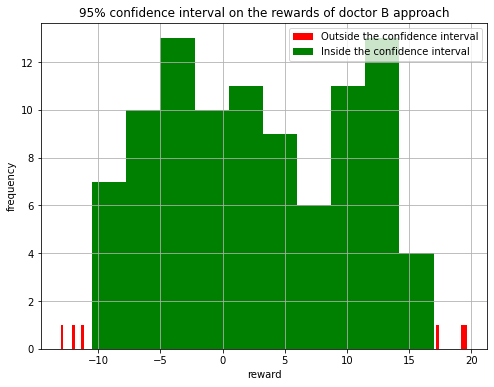

--------------------------------------------------------------------


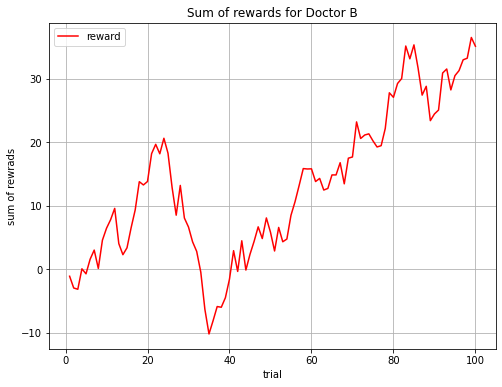

Lower bound: -6.168736647398081
Upper bound:  35.10151499272705


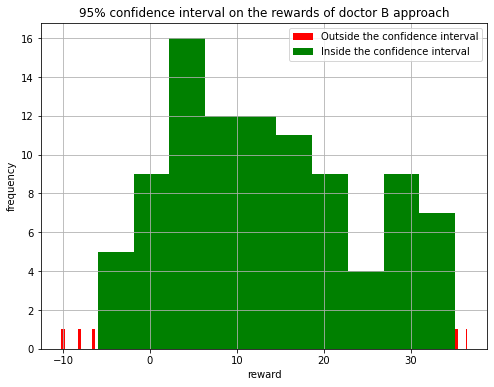

--------------------------------------------------------------------


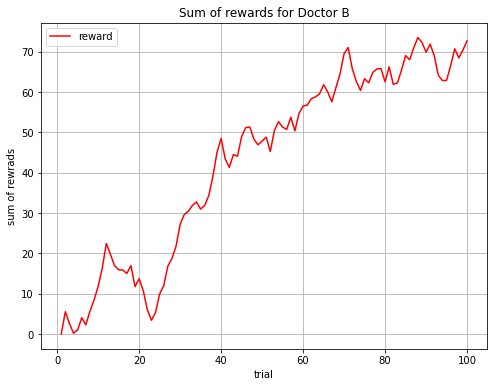

Lower bound: 1.6402949025199258
Upper bound:  72.13433713270047


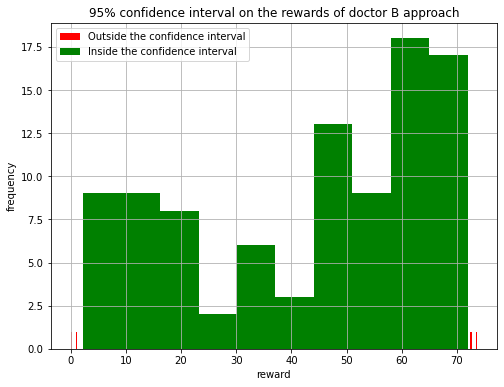

--------------------------------------------------------------------


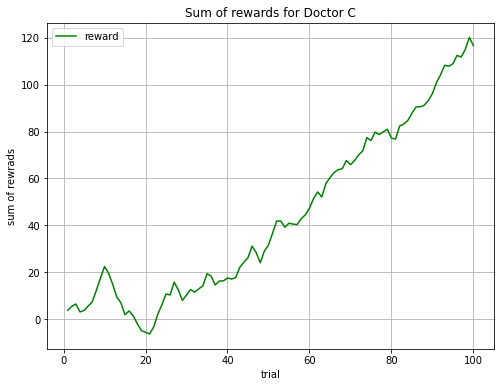

Lower bound: -4.213186300517996
Upper bound:  113.83333954268909


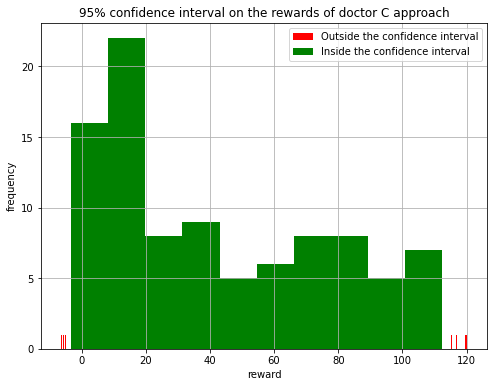

--------------------------------------------------------------------


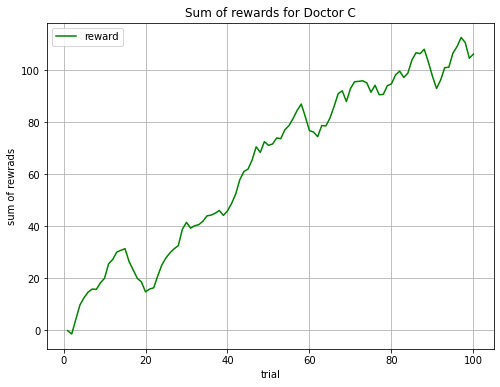

Lower bound: 6.7082605008805105
Upper bound:  108.51752107839734


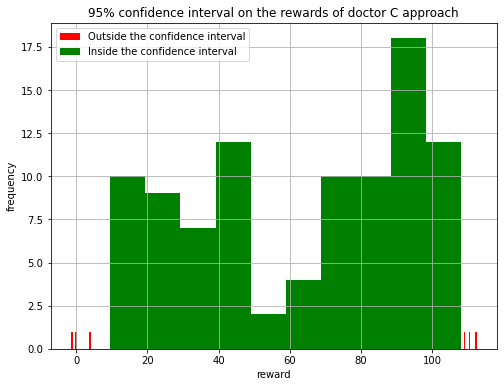

--------------------------------------------------------------------


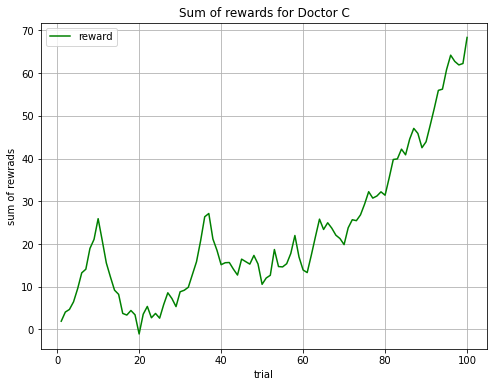

Lower bound: 2.6774140907311863
Upper bound:  62.503091318296946


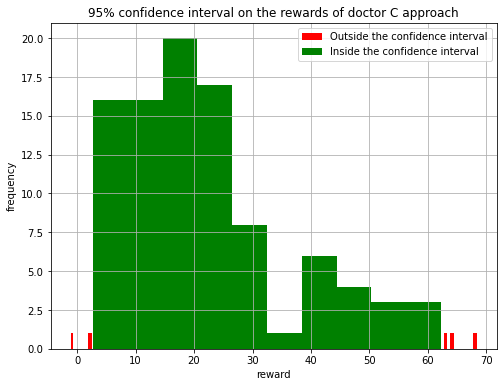

--------------------------------------------------------------------


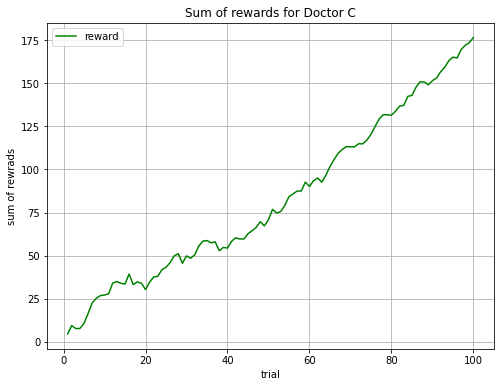

Lower bound: 8.53103845548091
Upper bound:  170.86202689487217


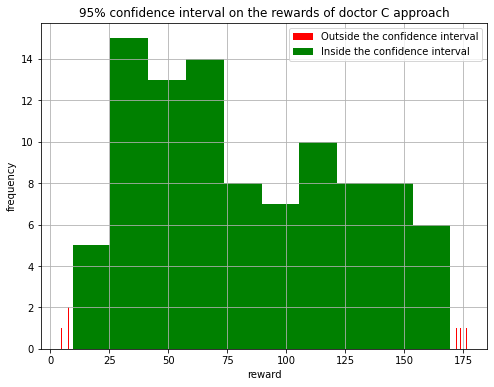

--------------------------------------------------------------------


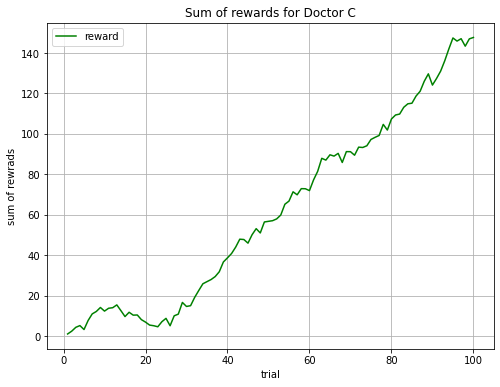

Lower bound: 3.7575477770999934
Upper bound:  147.03311000022117


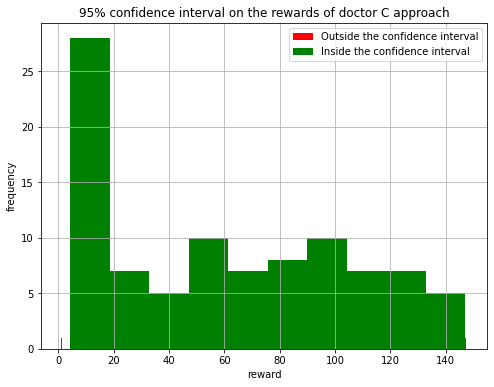

--------------------------------------------------------------------


In [166]:
for i in range(5):
    all_rewards = doctor_a_approach()
    draw_reward_trial_plot(all_rewards, "A", 'b')
    draw_confidence_interval(all_rewards, "A")
    print("--------------------------------------------------------------------")
    
print("=================================================================================")
    
for i in range(5):
    all_rewards = doctor_b_approach()
    draw_reward_trial_plot(all_rewards, "B", 'r')
    draw_confidence_interval(all_rewards, "B")
    print("--------------------------------------------------------------------")
    
print("=================================================================================")
    
for i in range(5):
    all_rewards = doctor_c_approach()
    draw_reward_trial_plot(all_rewards, "C", 'g')
    draw_confidence_interval(all_rewards, "C")
    print("--------------------------------------------------------------------")

## 20

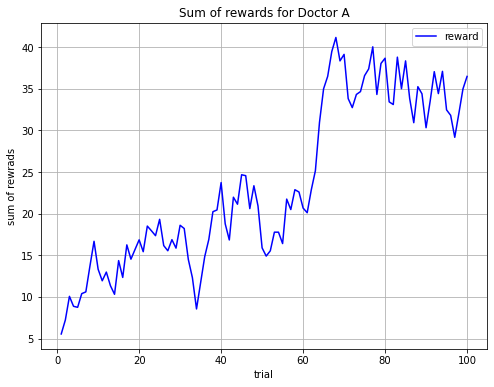

Lower bound: 8.645261327953083
Upper bound:  39.307138147885794


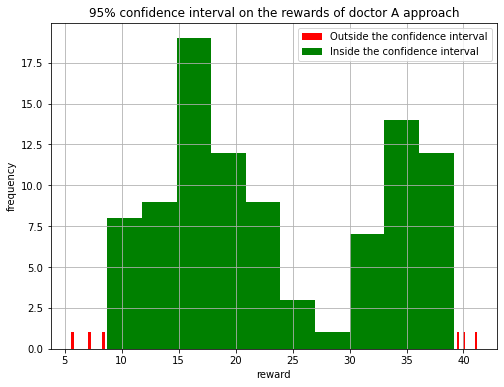

--------------------------------------------------------------------


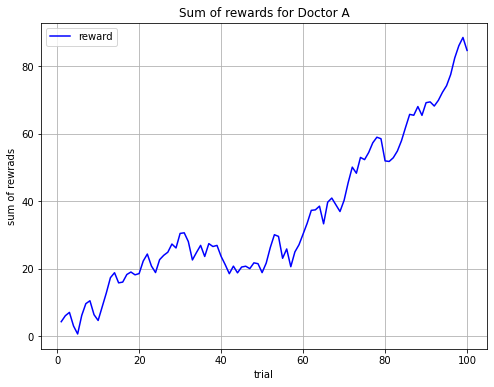

Lower bound: 4.551480730562789
Upper bound:  83.54738802741669


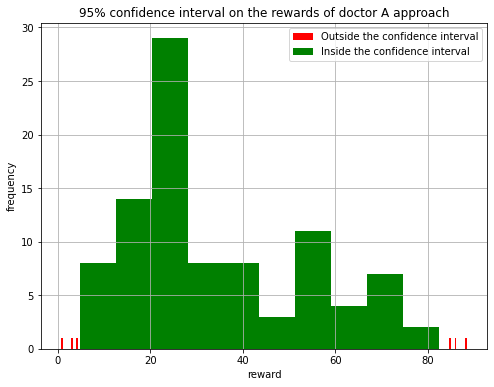

--------------------------------------------------------------------


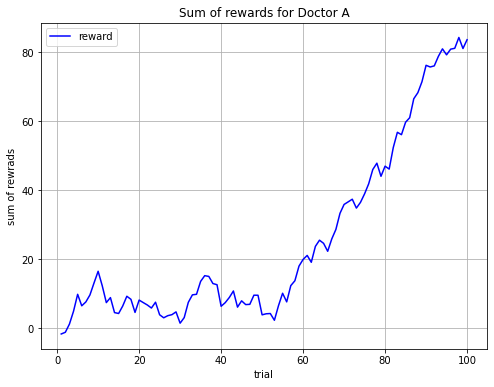

Lower bound: 1.3886731098053227
Upper bound:  81.02821528995314


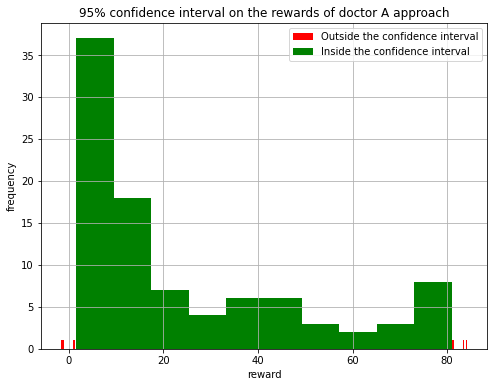

--------------------------------------------------------------------


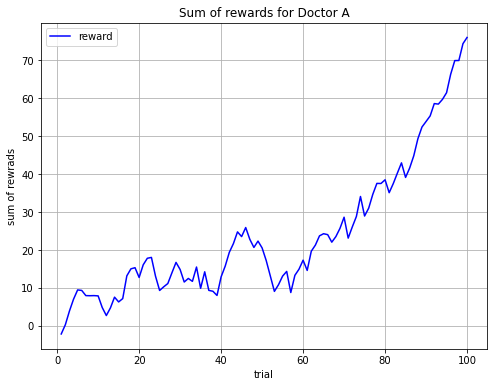

Lower bound: 3.2870353365763987
Upper bound:  69.90706705213901


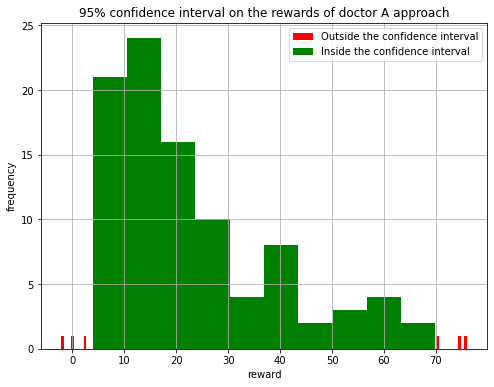

--------------------------------------------------------------------


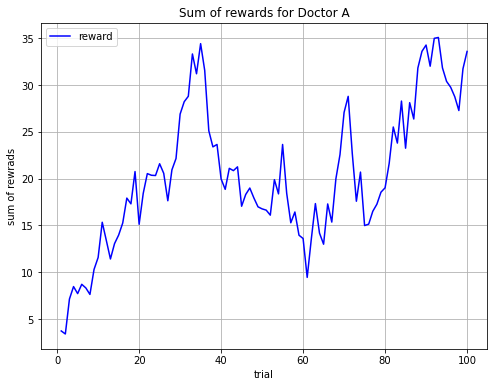

Lower bound: 7.372678533252406
Upper bound:  34.35677265385201


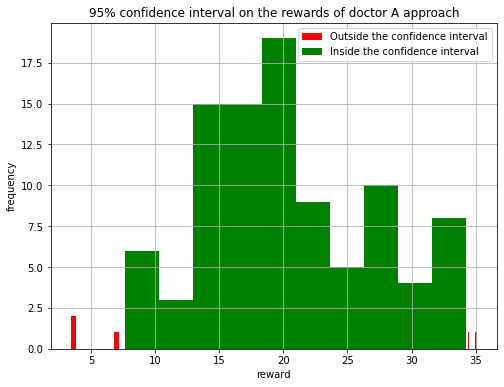

--------------------------------------------------------------------


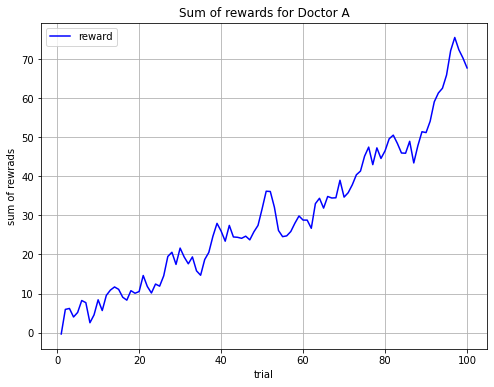

Lower bound: 4.270881141650635
Upper bound:  71.23608375930444


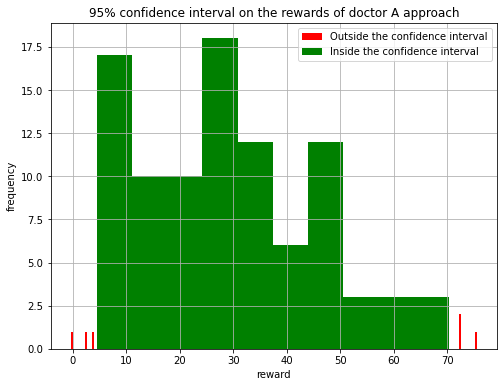

--------------------------------------------------------------------


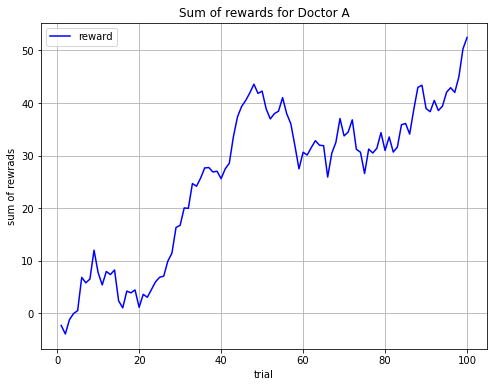

Lower bound: -0.6286281163845581
Upper bound:  44.297990056498264


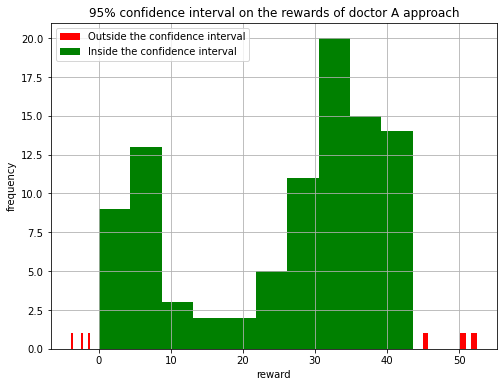

--------------------------------------------------------------------


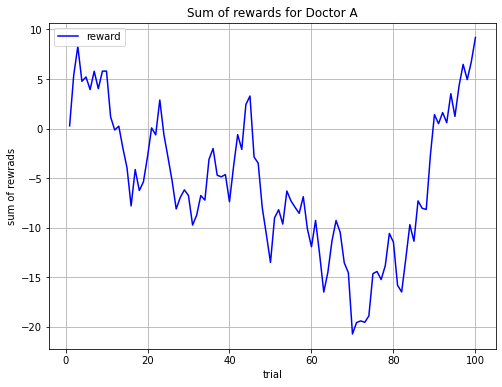

Lower bound: -19.478960848150706
Upper bound:  6.617343745226255


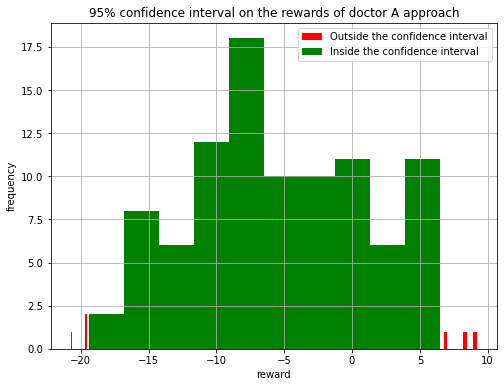

--------------------------------------------------------------------


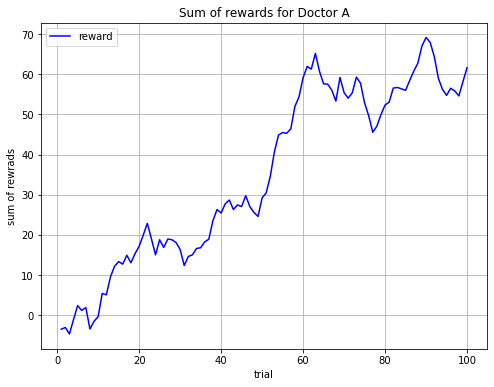

Lower bound: -3.2863796546540827
Upper bound:  66.16546599353994


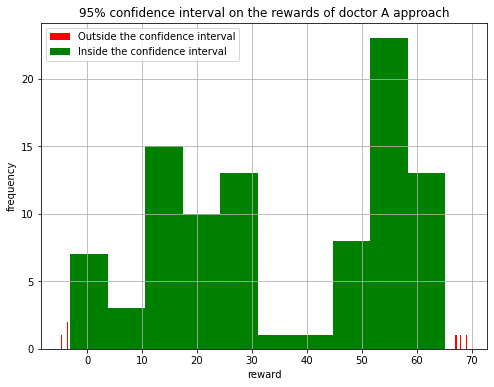

--------------------------------------------------------------------


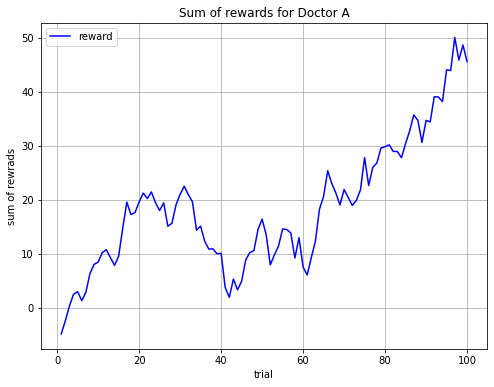

Lower bound: 0.8080529657479487
Upper bound:  45.71188636079527


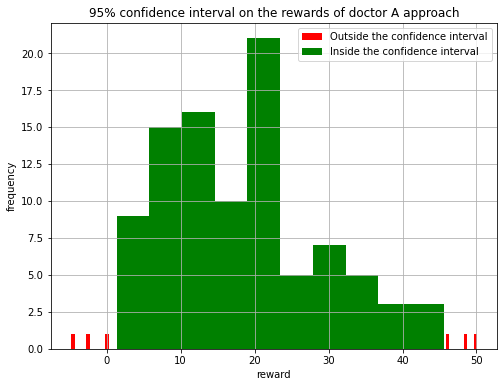

--------------------------------------------------------------------


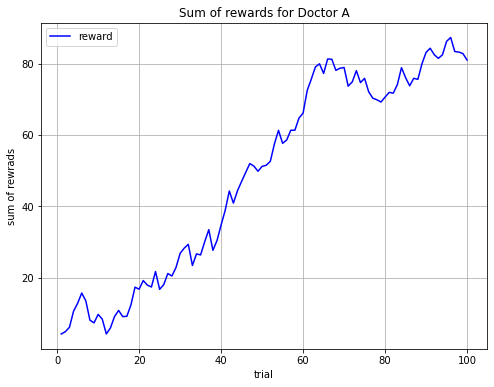

Lower bound: 5.357219547401762
Upper bound:  83.83900442061682


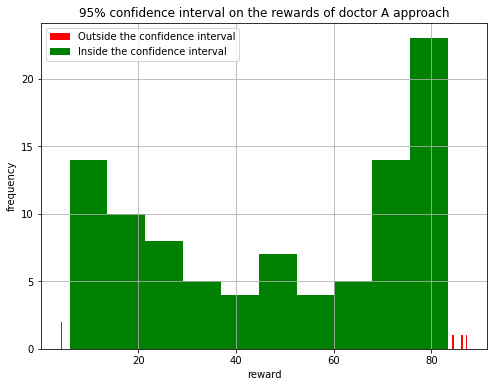

--------------------------------------------------------------------


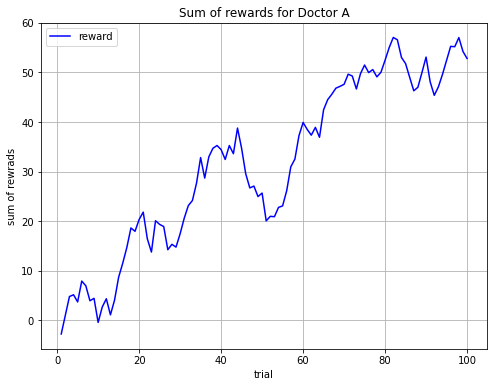

Lower bound: 1.0745320271269974
Upper bound:  55.934550317498655


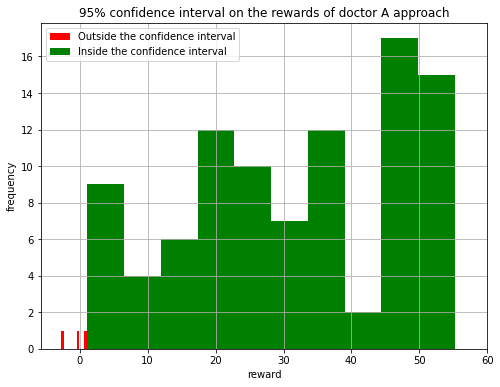

--------------------------------------------------------------------


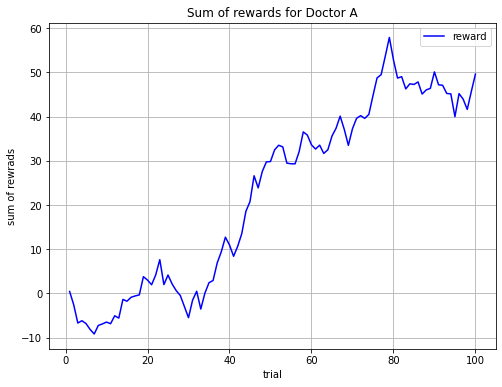

Lower bound: -7.087386558499599
Upper bound:  51.52978620016929


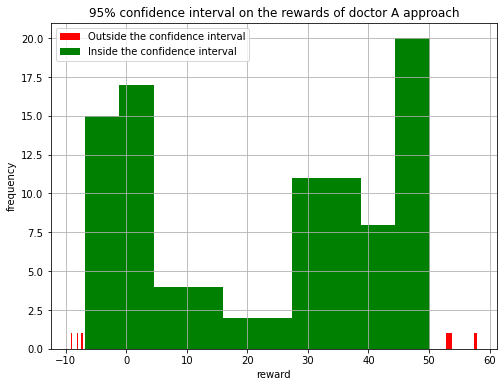

--------------------------------------------------------------------


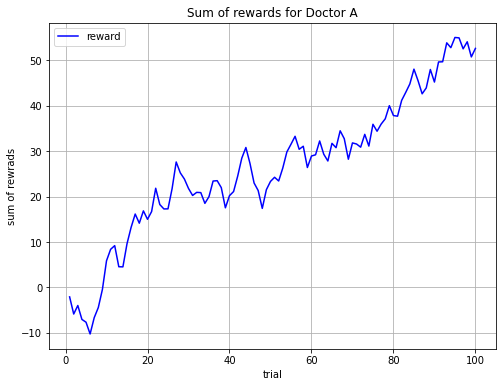

Lower bound: -6.8925536941598
Upper bound:  54.00784278043201


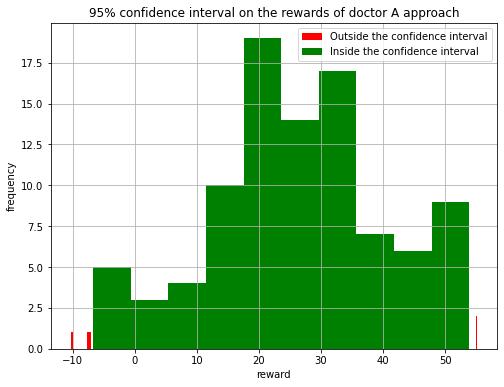

--------------------------------------------------------------------


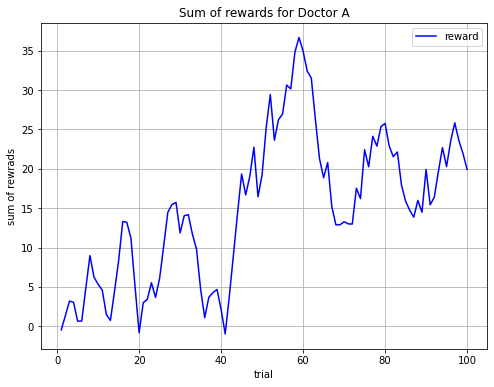

Lower bound: 0.06299099360878946
Upper bound:  33.665572189906776


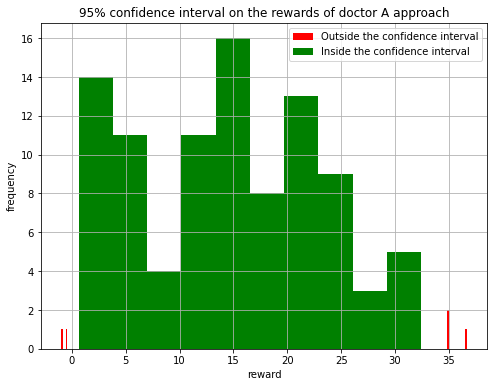

--------------------------------------------------------------------


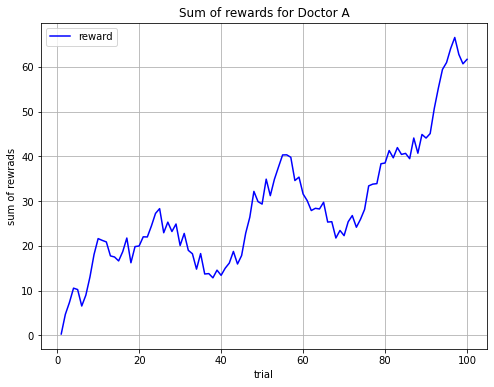

Lower bound: 6.930705897210648
Upper bound:  62.268569656286


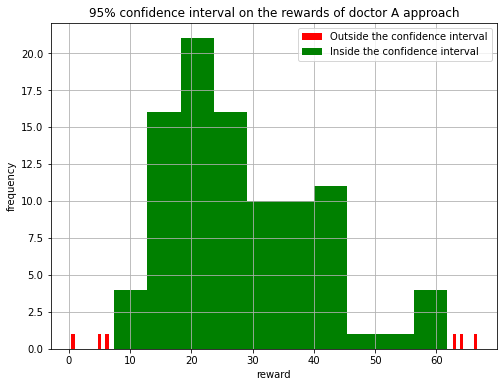

--------------------------------------------------------------------


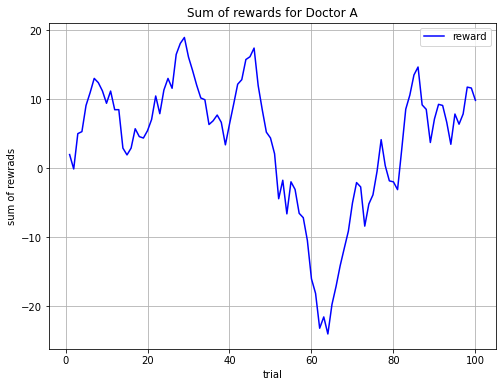

Lower bound: -20.71634358942801
Upper bound:  16.97391267566525


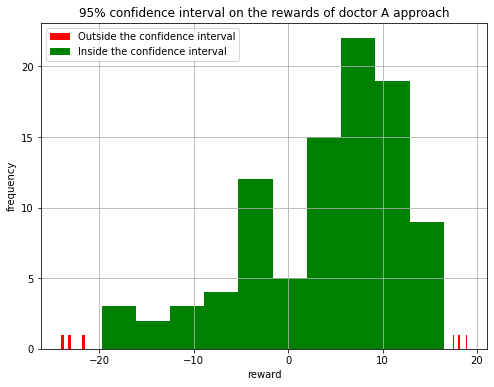

--------------------------------------------------------------------


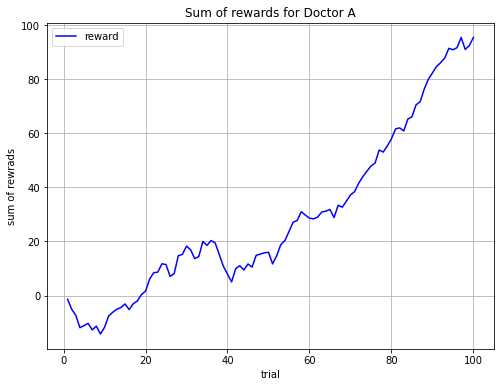

Lower bound: -11.846745244338335
Upper bound:  92.1086389792443


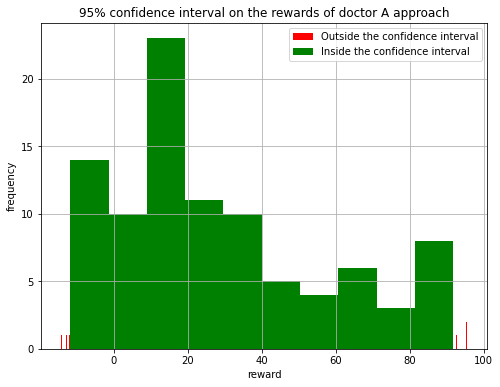

--------------------------------------------------------------------


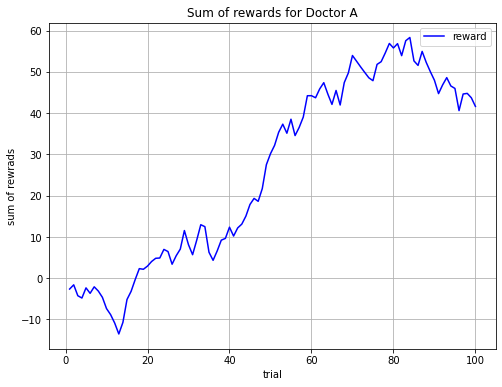

Lower bound: -9.81163625194911
Upper bound:  56.86407694406316


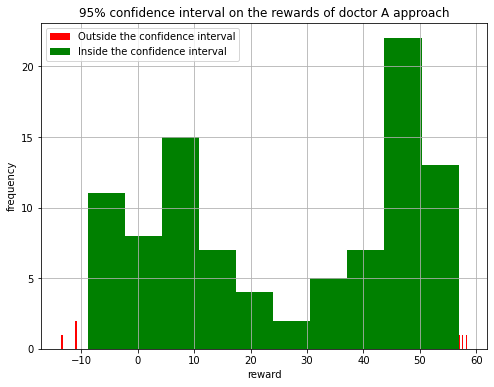

--------------------------------------------------------------------


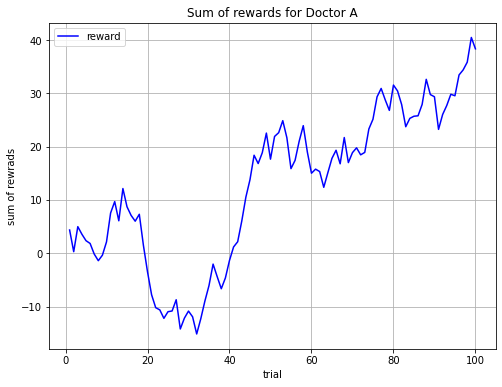

Lower bound: -12.24288185383891
Upper bound:  35.143263630328484


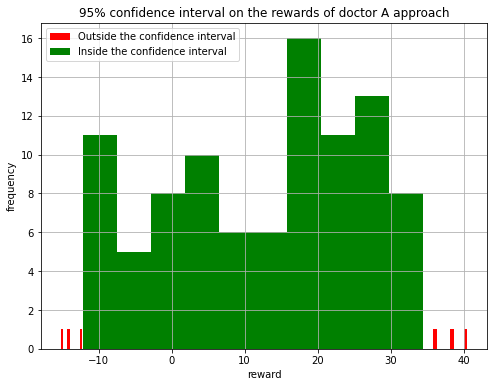

--------------------------------------------------------------------


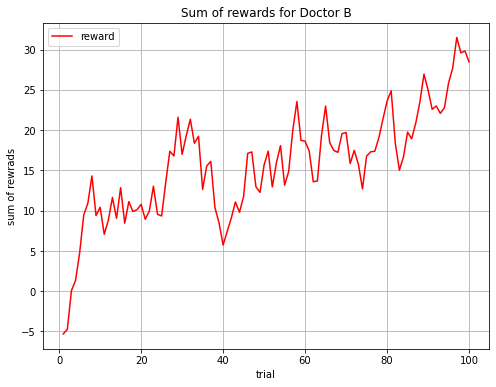

Lower bound: 0.6715327210543981
Upper bound:  29.075224045863926


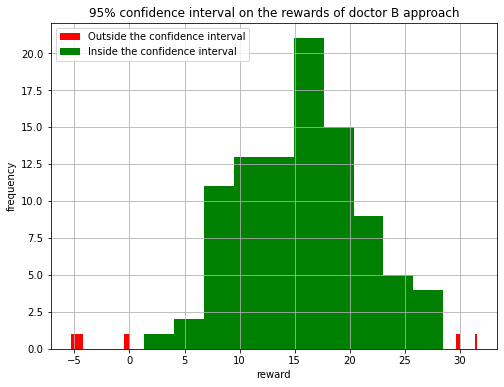

--------------------------------------------------------------------


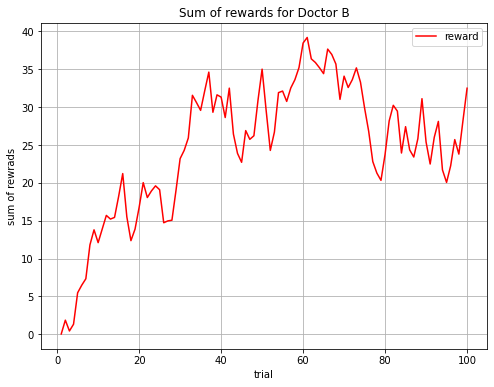

Lower bound: 1.5870693003472955
Upper bound:  37.3296036331867


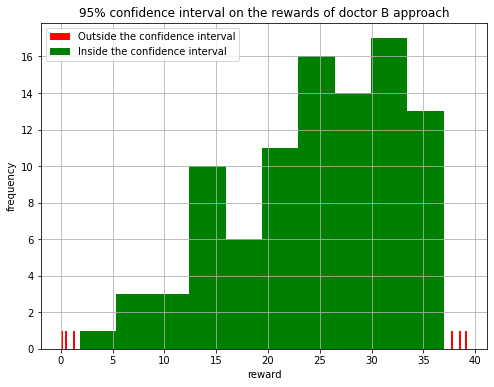

--------------------------------------------------------------------


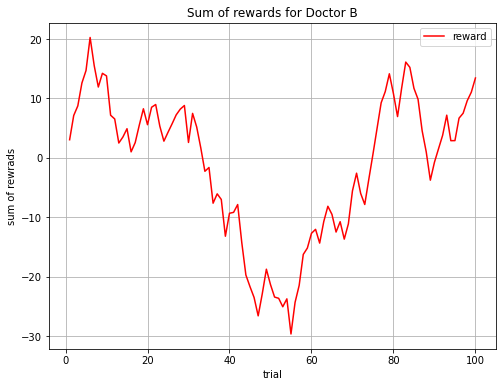

Lower bound: -24.7304084730777
Upper bound:  15.396684515294742


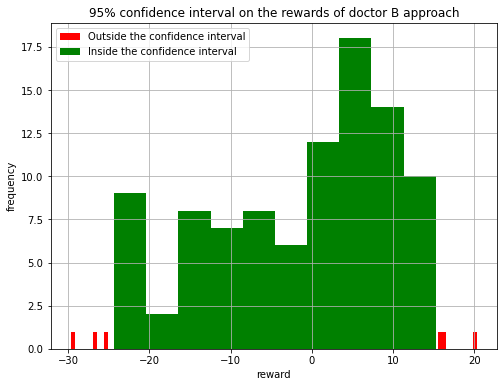

--------------------------------------------------------------------


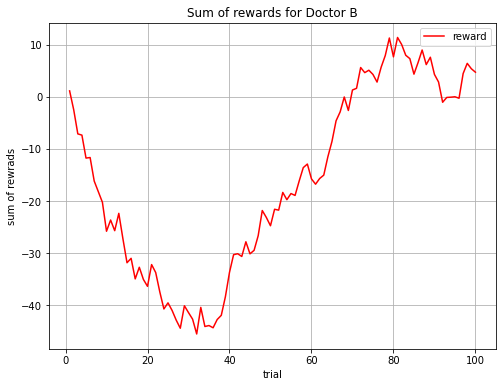

Lower bound: -44.18907852115534
Upper bound:  9.53102275426409


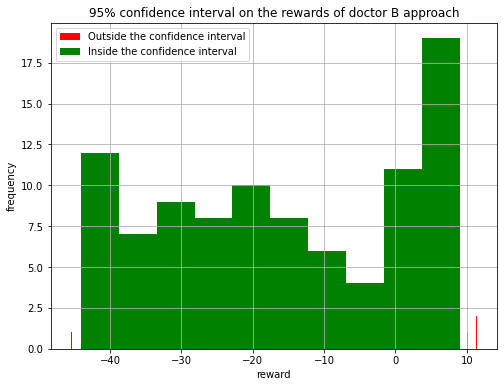

--------------------------------------------------------------------


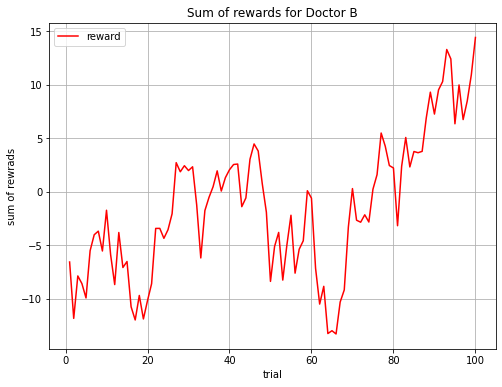

Lower bound: -12.531109566080046
Upper bound:  11.704373454305237


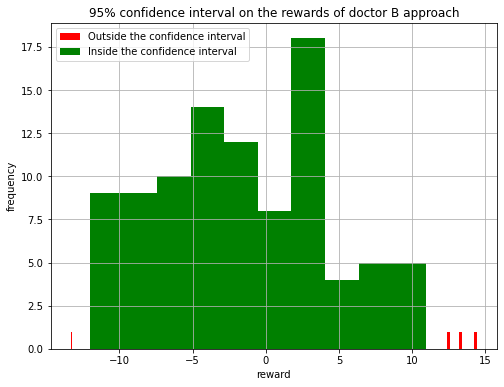

--------------------------------------------------------------------


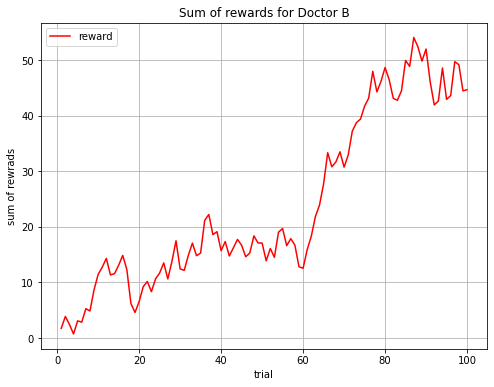

Lower bound: 2.638432908176725
Upper bound:  51.04243181170216


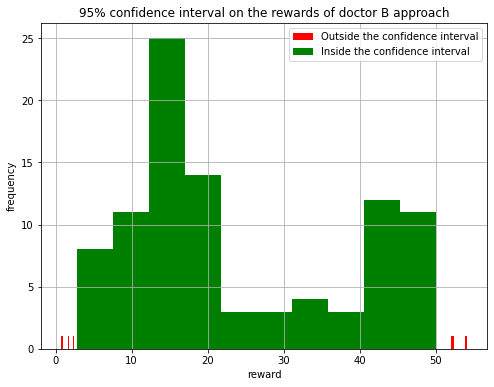

--------------------------------------------------------------------


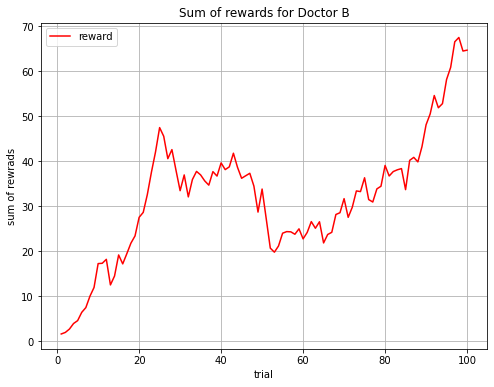

Lower bound: 3.3000503026399732
Upper bound:  64.59992084076359


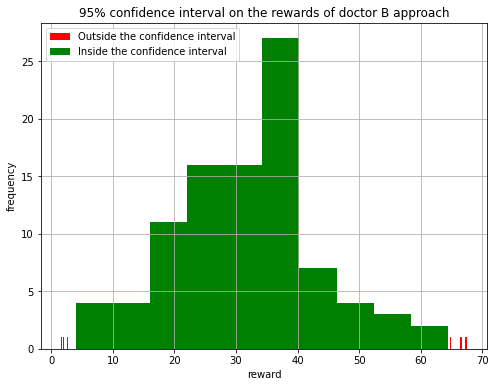

--------------------------------------------------------------------


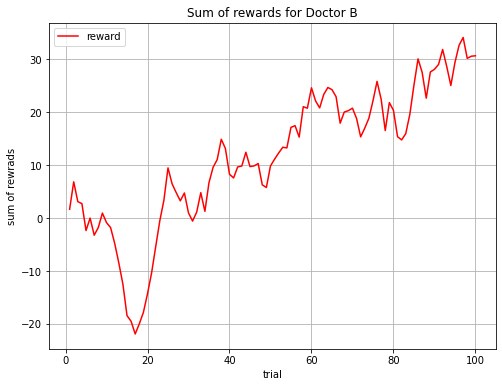

Lower bound: -19.001899257037017
Upper bound:  31.290443287300256


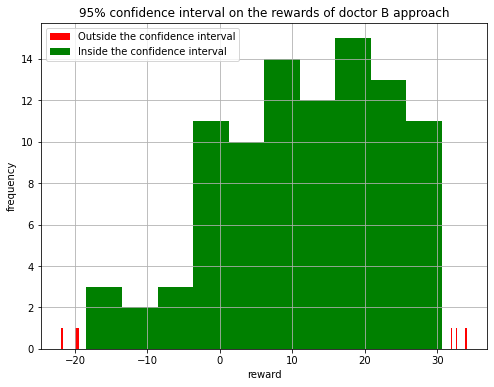

--------------------------------------------------------------------


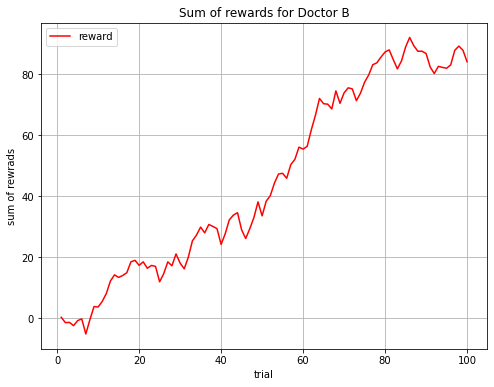

Lower bound: -1.409716686350059
Upper bound:  89.07447053921842


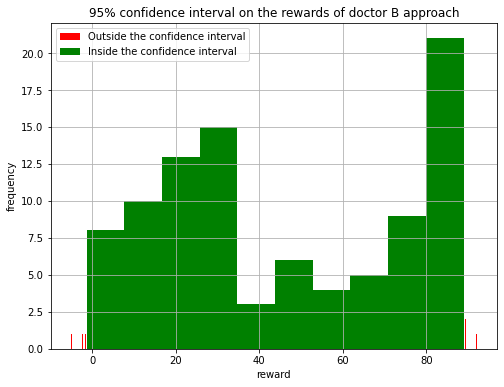

--------------------------------------------------------------------


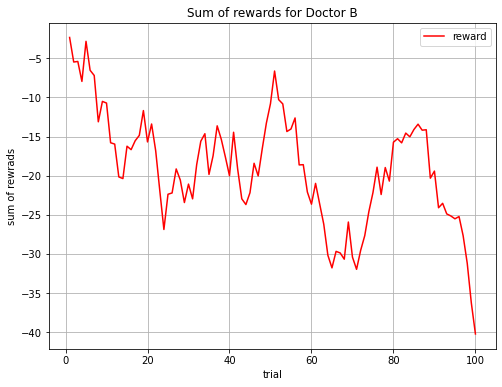

Lower bound: -31.886382359405996
Upper bound:  -5.439083005211222


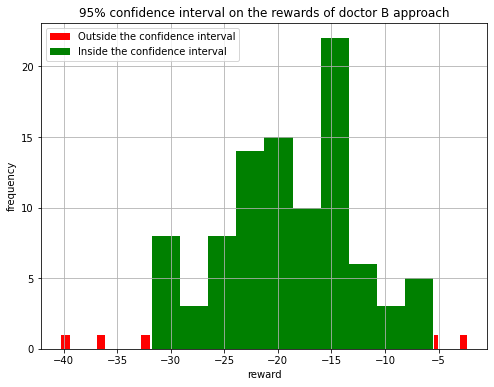

--------------------------------------------------------------------


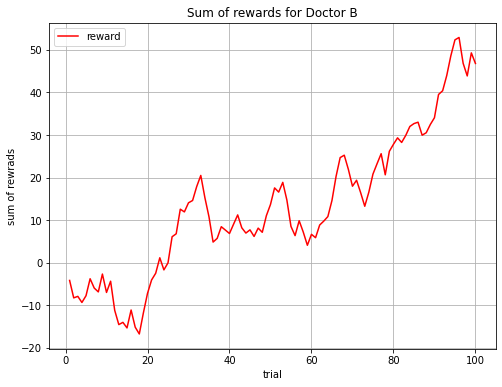

Lower bound: -14.854709258401899
Upper bound:  48.95054729361112


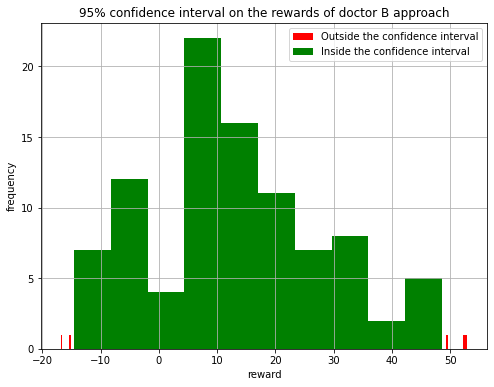

--------------------------------------------------------------------


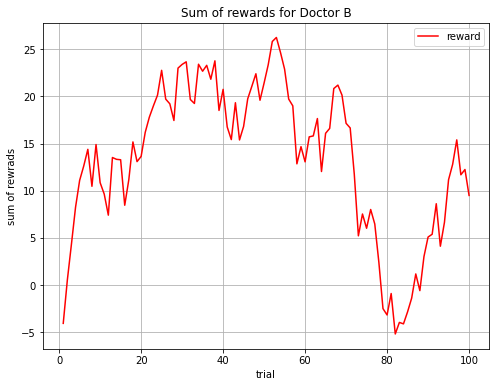

Lower bound: -4.012508630858928
Upper bound:  24.231191007566856


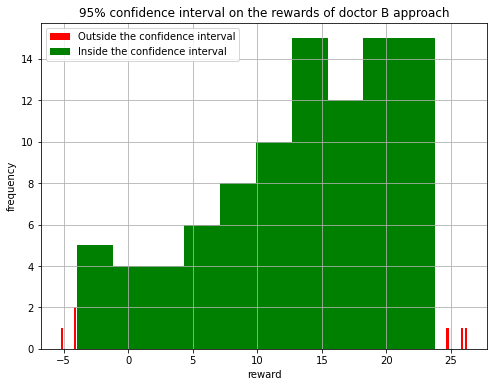

--------------------------------------------------------------------


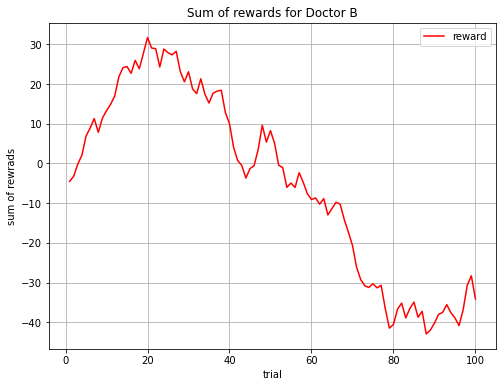

Lower bound: -41.147399660817754
Upper bound:  28.86073198425399


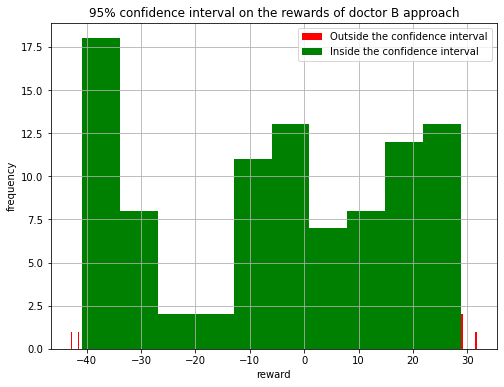

--------------------------------------------------------------------


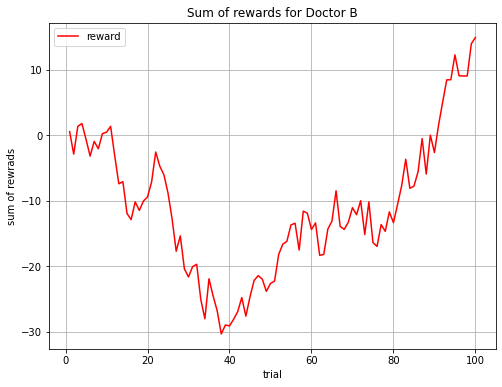

Lower bound: -28.556885106625817
Upper bound:  10.773579307213382


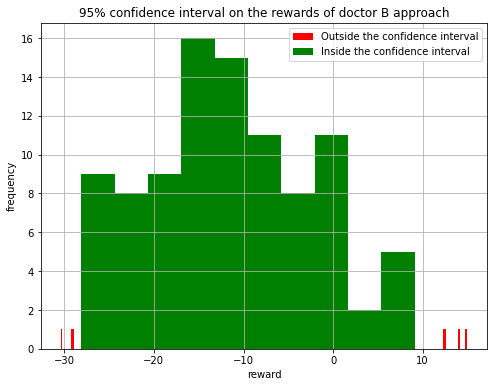

--------------------------------------------------------------------


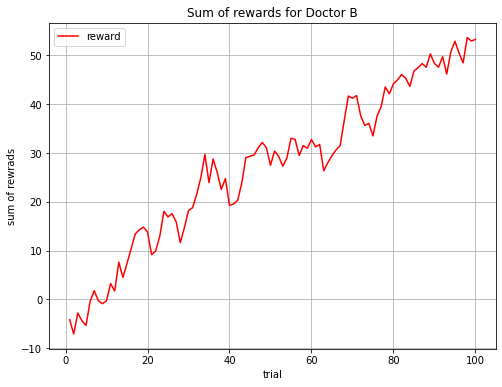

Lower bound: -4.272183354552578
Upper bound:  52.93680398506199


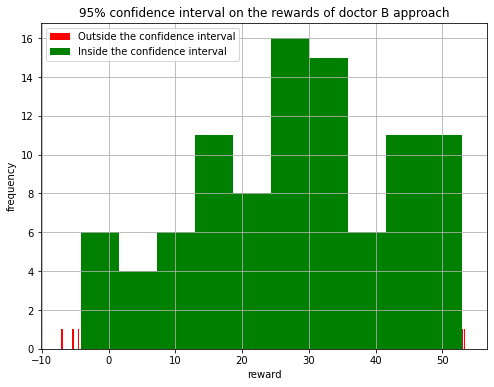

--------------------------------------------------------------------


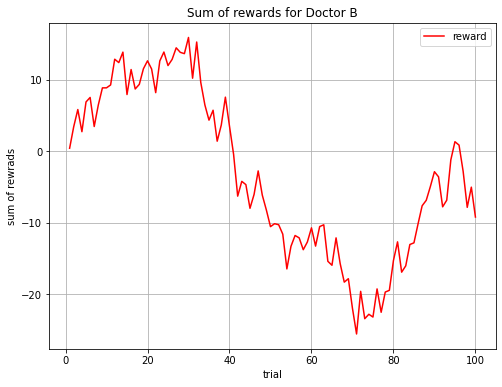

Lower bound: -23.001831094797343
Upper bound:  14.197597132484225


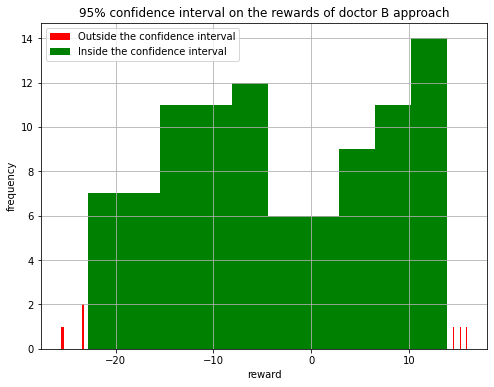

--------------------------------------------------------------------


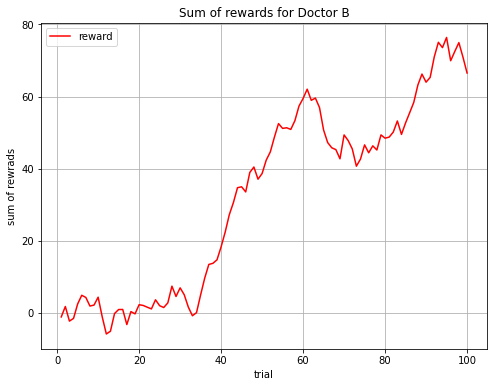

Lower bound: -2.821225409510659
Upper bound:  74.30921813180903


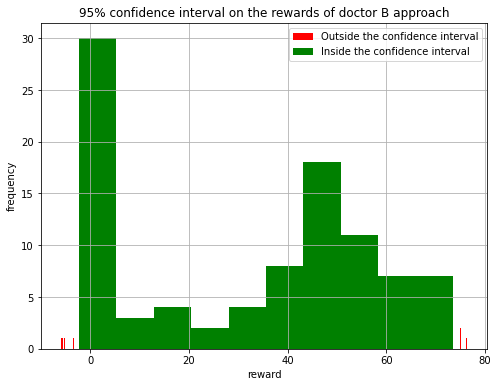

--------------------------------------------------------------------


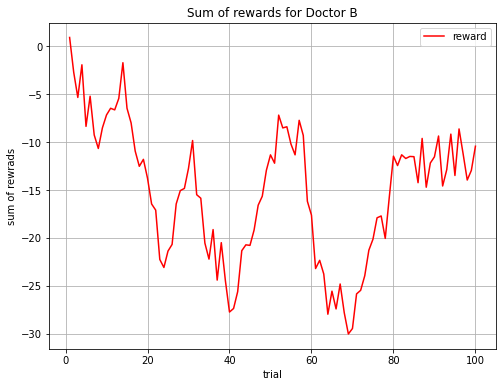

Lower bound: -27.891521934618503
Upper bound:  -2.3142258560955886


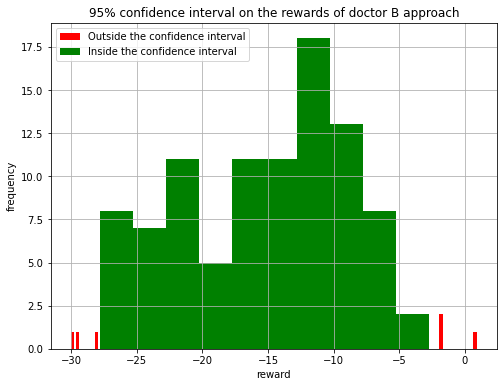

--------------------------------------------------------------------


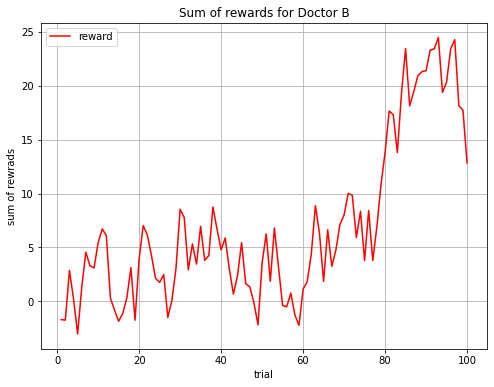

Lower bound: -2.018467709844326
Upper bound:  23.436076291180044


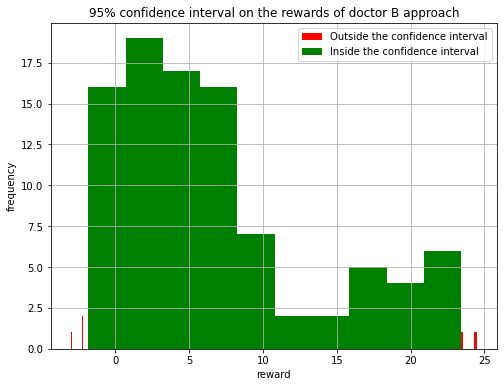

--------------------------------------------------------------------


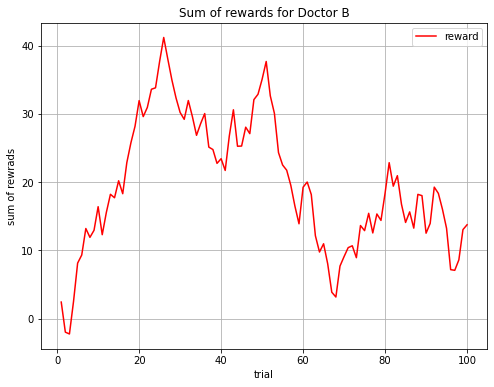

Lower bound: 2.47075637494935
Upper bound:  37.67552523221909


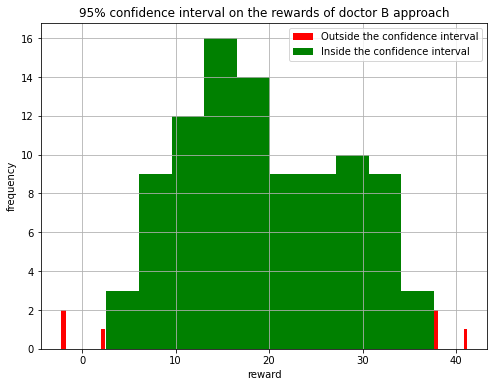

--------------------------------------------------------------------


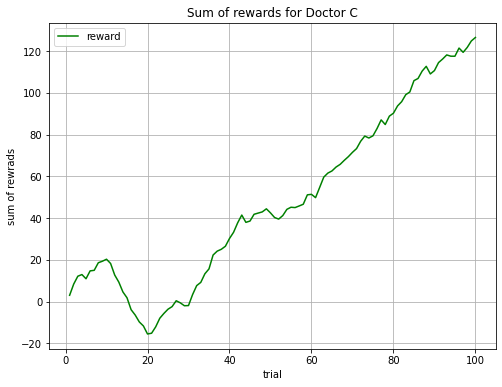

Lower bound: -11.936987845936454
Upper bound:  121.6557774179364


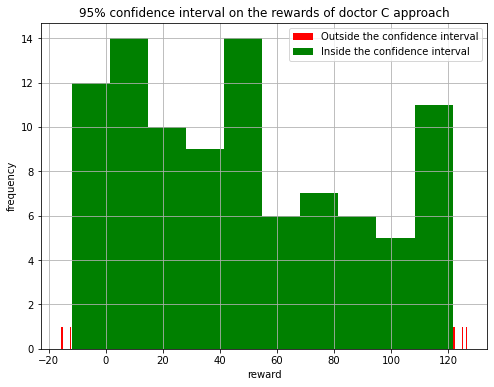

--------------------------------------------------------------------


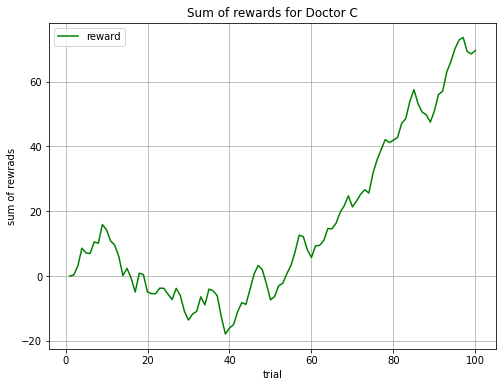

Lower bound: -14.31228219193283
Upper bound:  69.82239828978058


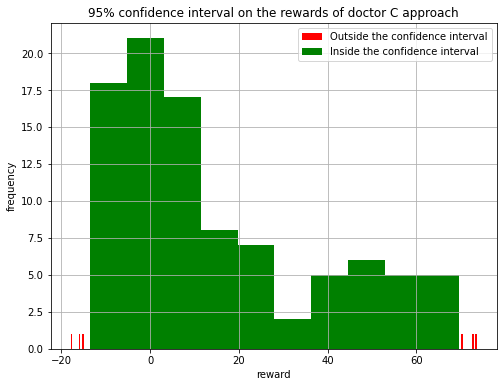

--------------------------------------------------------------------


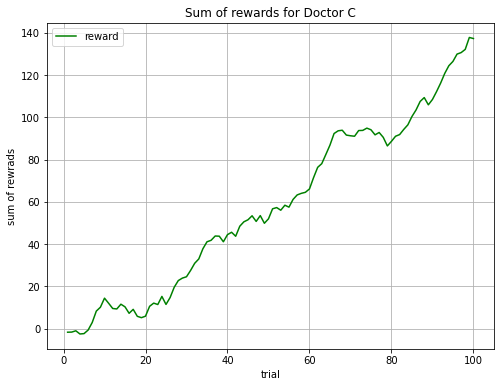

Lower bound: -1.6882101424687317
Upper bound:  131.45023322982422


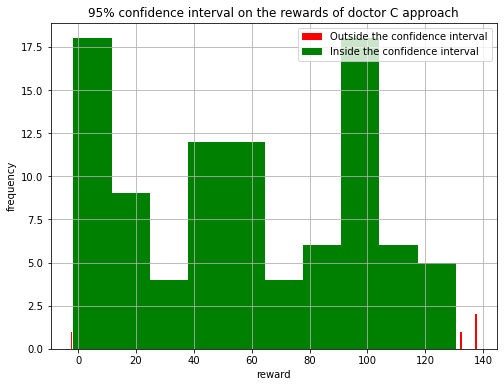

--------------------------------------------------------------------


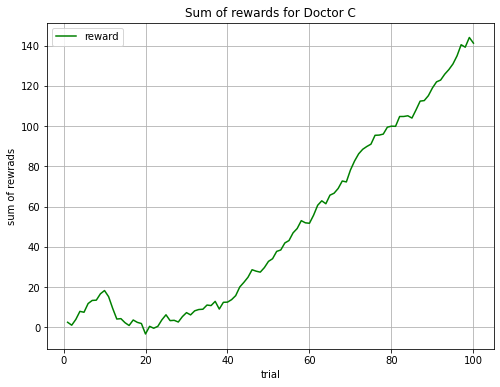

Lower bound: 0.5077989099893404
Upper bound:  139.87428799979466


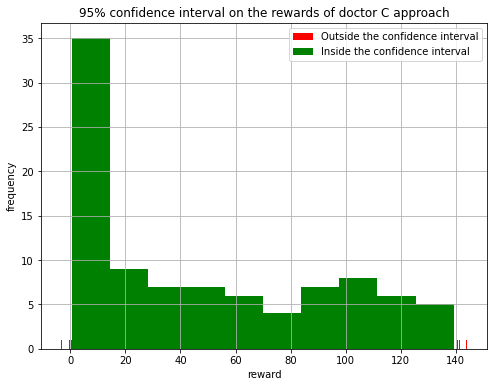

--------------------------------------------------------------------


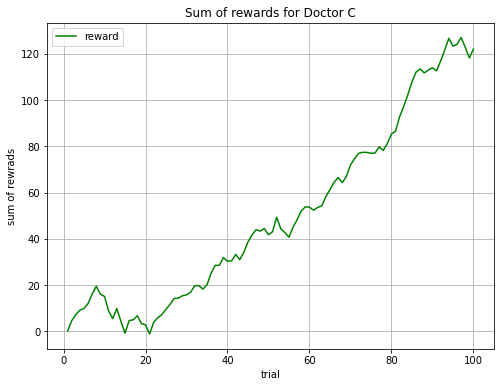

Lower bound: 1.4130372563292701
Upper bound:  123.73023938092854


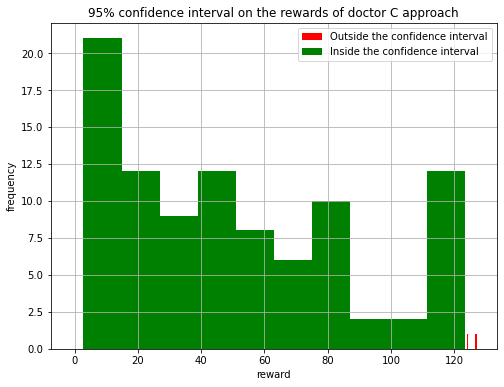

--------------------------------------------------------------------


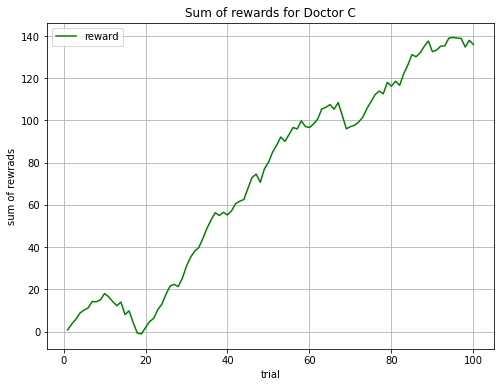

Lower bound: 1.277362863735519
Upper bound:  138.96484312355093


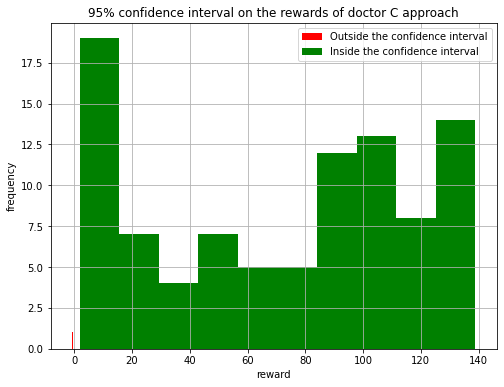

--------------------------------------------------------------------


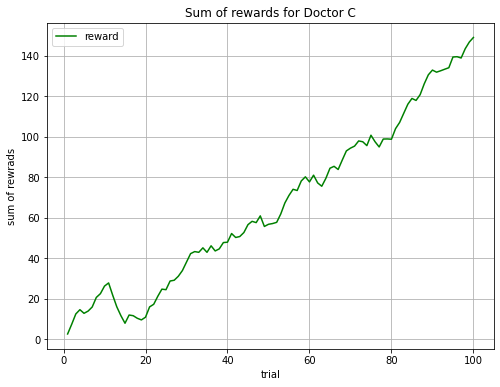

Lower bound: 8.651397981479743
Upper bound:  141.47970696541213


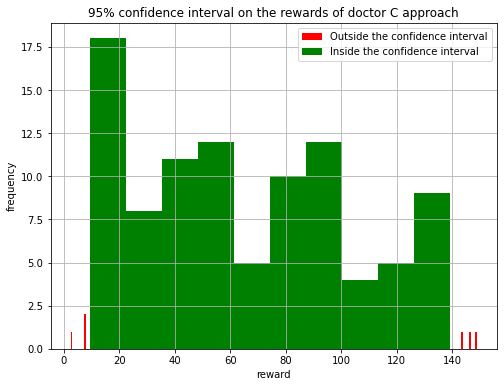

--------------------------------------------------------------------


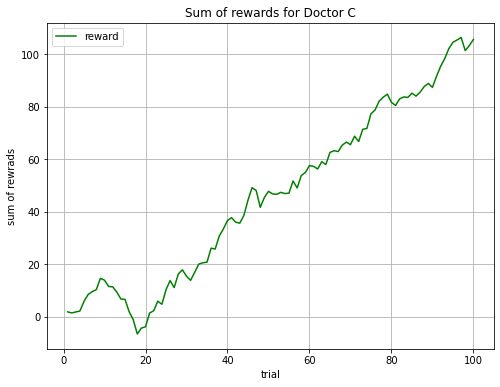

Lower bound: -2.559434542017661
Upper bound:  104.9194900751632


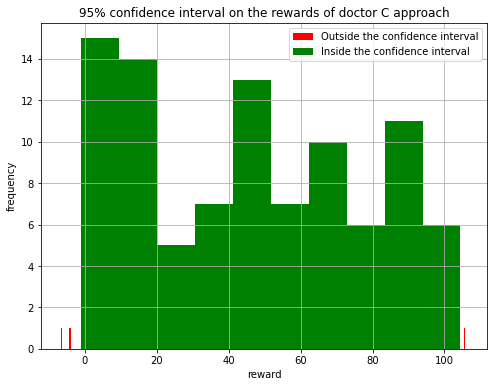

--------------------------------------------------------------------


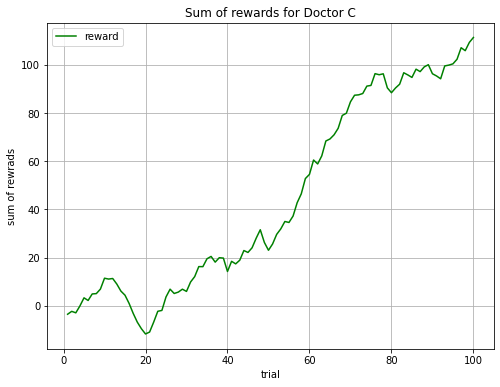

Lower bound: -8.213031342071249
Upper bound:  106.55364173676729


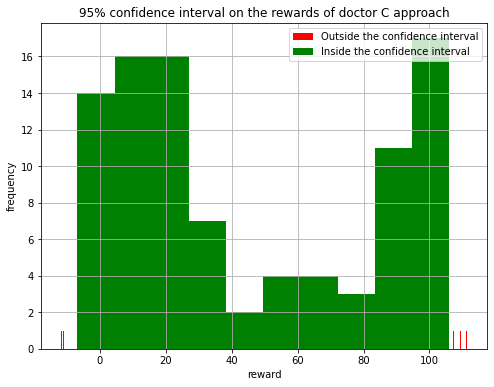

--------------------------------------------------------------------


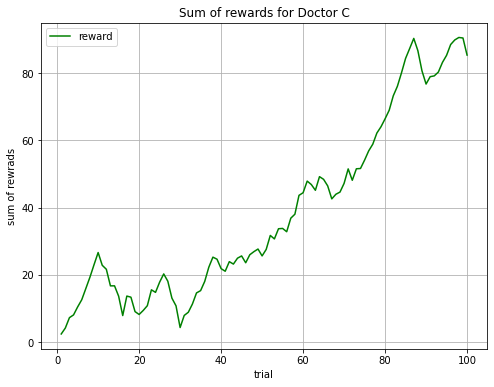

Lower bound: 5.718920928393089
Upper bound:  90.14389893007484


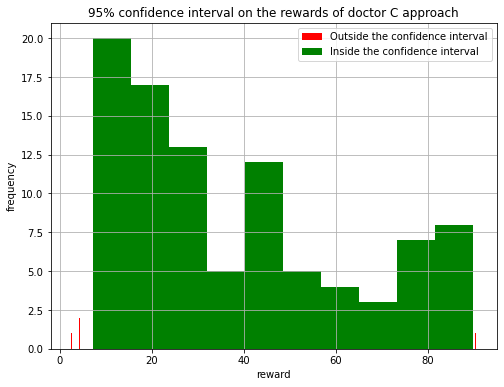

--------------------------------------------------------------------


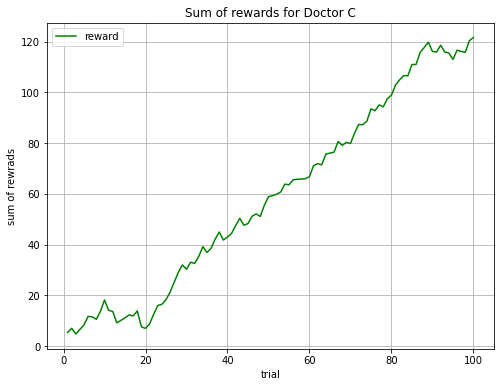

Lower bound: 6.744444722332498
Upper bound:  119.2105587332895


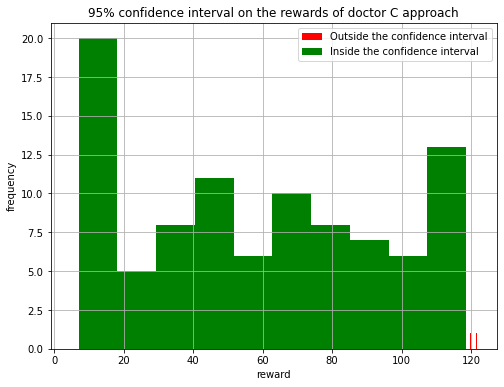

--------------------------------------------------------------------


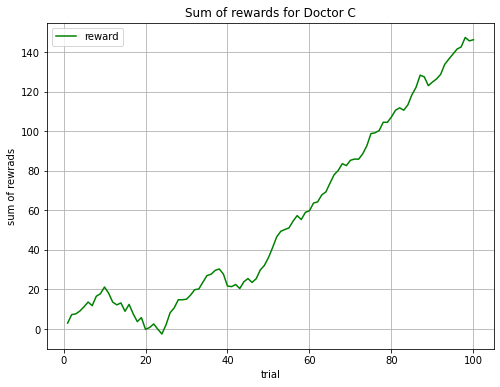

Lower bound: 0.3124101567104241
Upper bound:  144.14889092152382


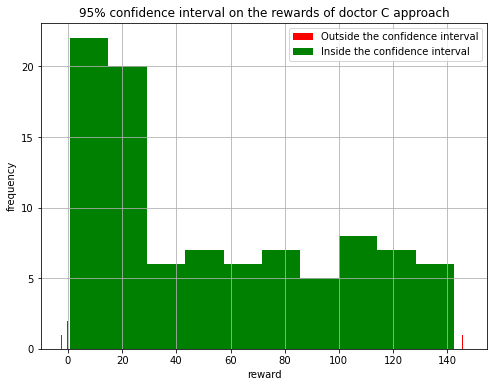

--------------------------------------------------------------------


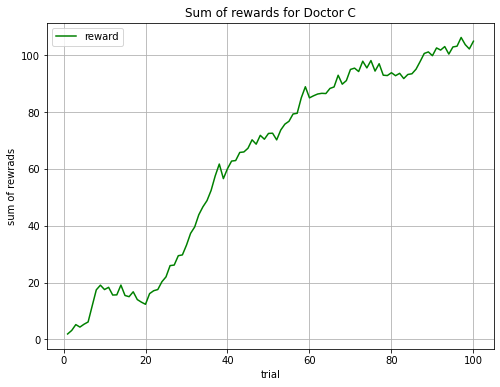

Lower bound: 4.748754508492967
Upper bound:  103.45826482912092


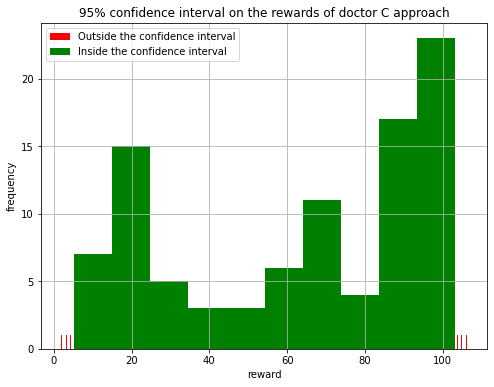

--------------------------------------------------------------------


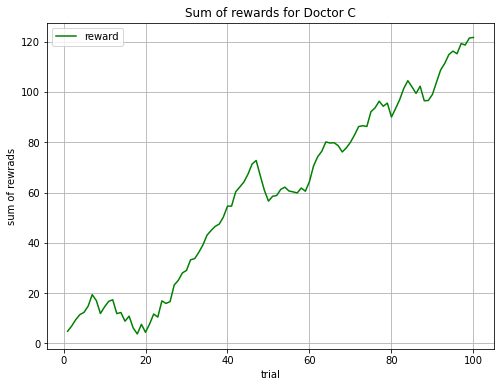

Lower bound: 5.480958399305163
Upper bound:  118.90889820511623


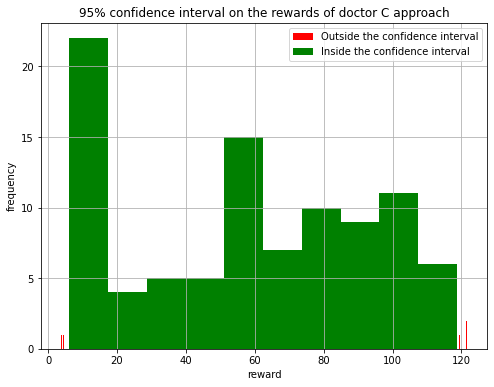

--------------------------------------------------------------------


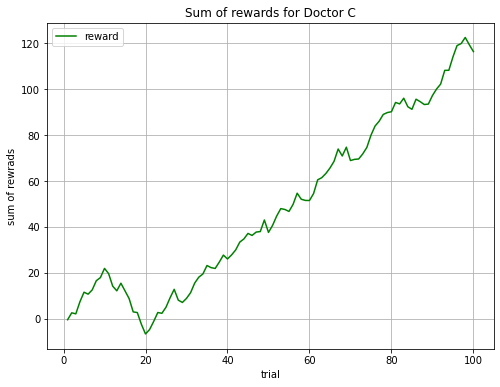

Lower bound: -1.8622249723862874
Upper bound:  119.2611472692331


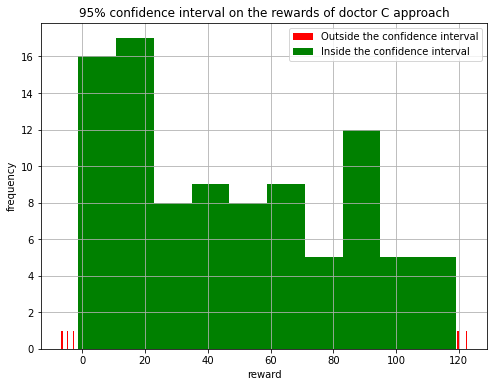

--------------------------------------------------------------------


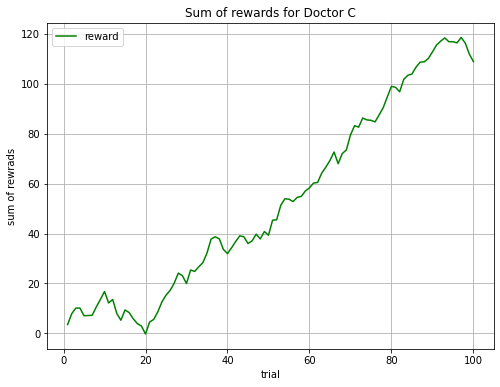

Lower bound: 3.731425727908693
Upper bound:  116.923459547637


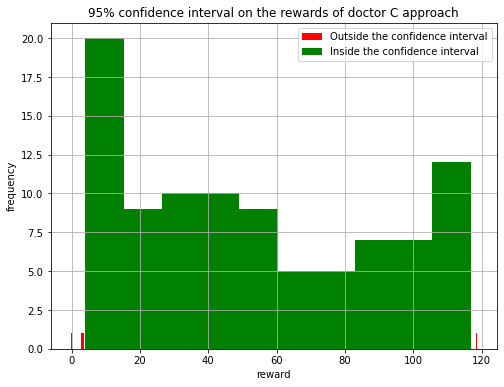

--------------------------------------------------------------------


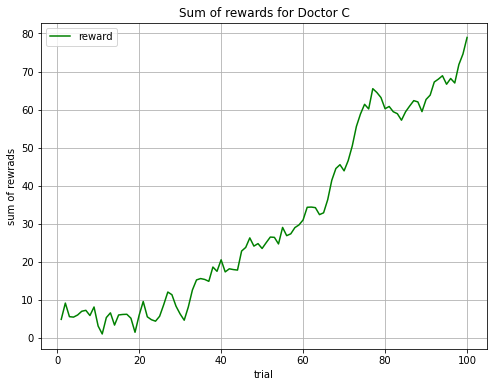

Lower bound: 3.199288423577484
Upper bound:  70.42634232506659


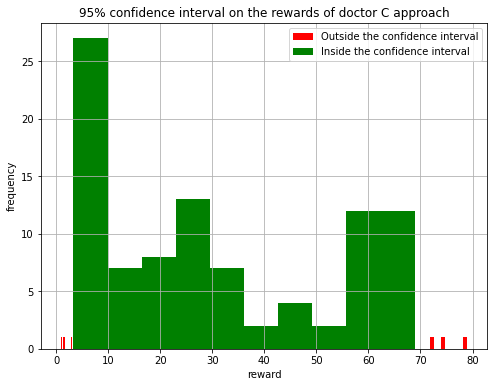

--------------------------------------------------------------------


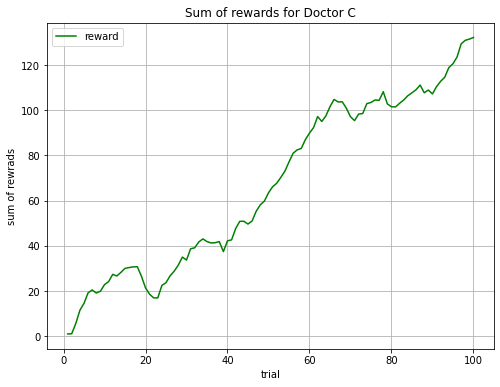

Lower bound: 8.477610124946638
Upper bound:  130.17352626874123


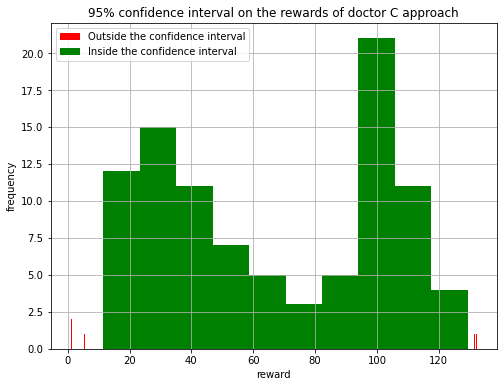

--------------------------------------------------------------------


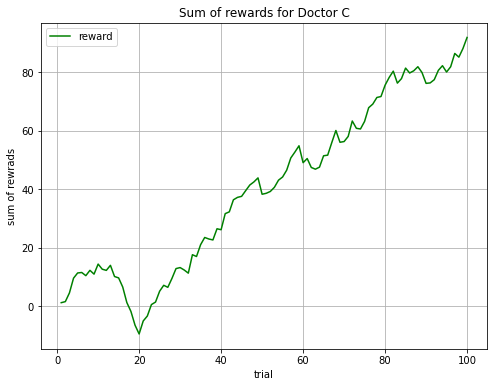

Lower bound: -4.275303023308852
Upper bound:  85.82789643830299


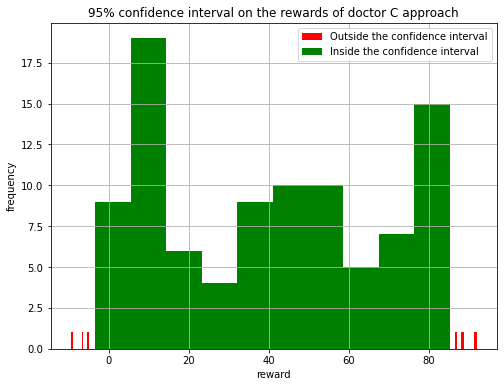

--------------------------------------------------------------------


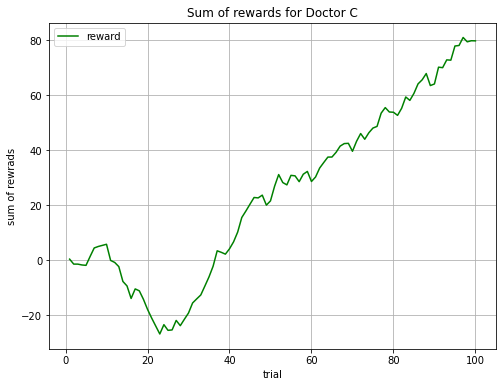

Lower bound: -24.730359031552577
Upper bound:  79.58748734956548


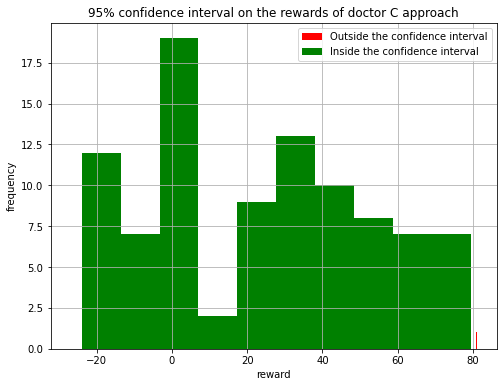

--------------------------------------------------------------------


In [167]:
for i in range(20):
    all_rewards = doctor_a_approach()
    draw_reward_trial_plot(all_rewards, "A", 'b')
    draw_confidence_interval(all_rewards, "A")
    print("--------------------------------------------------------------------")
    
print("=================================================================================")
    
for i in range(20):
    all_rewards = doctor_b_approach()
    draw_reward_trial_plot(all_rewards, "B", 'r')
    draw_confidence_interval(all_rewards, "B")
    print("--------------------------------------------------------------------")
    
print("=================================================================================")
    
for i in range(20):
    all_rewards = doctor_c_approach()
    draw_reward_trial_plot(all_rewards, "C", 'g')
    draw_confidence_interval(all_rewards, "C")
    print("--------------------------------------------------------------------")

# Question 4

In [173]:
# def draw_box_plot(doctor_name, *rewards):
#     fig = plt.figure(figsize =(10, 7))
#     plt.boxplot(rewards)
#     plt.title("Box plot of doctor " + doctor_name +" approach")
#     plt.xlabel('doctor ' + doctor_name)
#     plt.ylabel('reward')
#     plt.grid()
#     plt.show()
    

def draw_box_plot(doctors_name, rewards):
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(rewards)
    plt.title("Box plot of doctors approach")
    plt.xlabel('doctors')
    plt.ylabel('reward')
    plt.xticks(range(1, len(doctors_name)+1), doctors_name)
    plt.grid()
    plt.show()

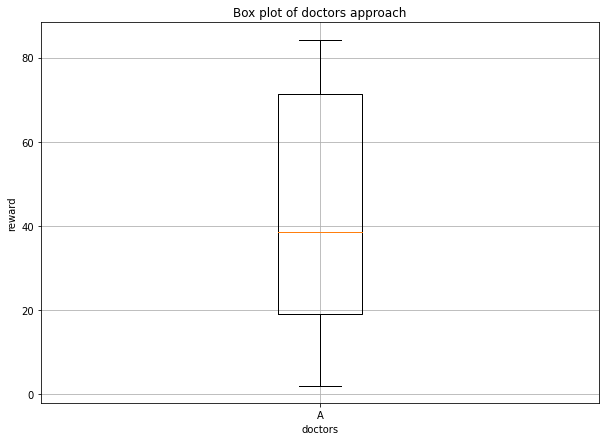

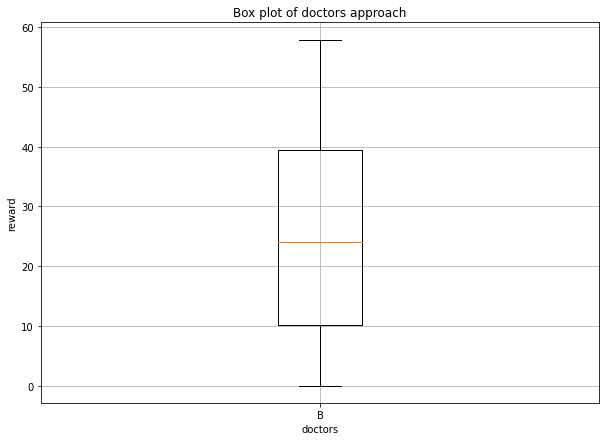

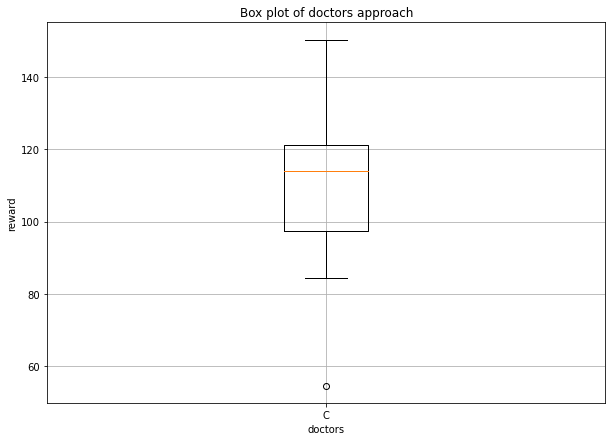

In [174]:
last_reward_a = []
for i in range(10):
    all_rewards = doctor_a_approach()
    last_reward_a.append(all_rewards[-1])
draw_box_plot(["A"], last_reward_a)
    
print("=================================================================================")
    
last_reward_b = []
for i in range(10):
    all_rewards = doctor_b_approach()
    last_reward_b.append(all_rewards[-1])
draw_box_plot(["B"], last_reward_b)
    
print("=================================================================================")
    
last_reward_c = []
for i in range(10):
    all_rewards = doctor_c_approach()
    last_reward_c.append(all_rewards[-1])
draw_box_plot(["C"], last_reward_c)

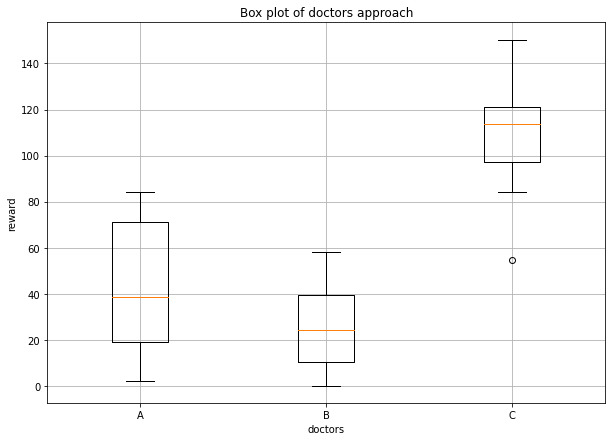

In [175]:
# fig = plt.figure(figsize =(10, 7))
# plt.boxplot([last_reward_a, last_reward_b, last_reward_c])
# plt.title("Box plot of doctors approach")
# plt.xlabel('doctors')
# plt.ylabel('reward')
# plt.xticks([1, 2, 3], ['A', 'B', 'C'])
# plt.grid()
# plt.show()

draw_box_plot(["A", "B", "C"], [last_reward_a, last_reward_b, last_reward_c])